In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [2]:
# Importing dataset
data=pd.read_csv(r"C:\Users\Rupali\Downloads\PD data1 sent to Proajyot Sir.csv")

In [3]:
data.head()

,Sr.,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,1,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,2,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,3,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,4,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,5,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Data Description

In [4]:
#null values in data
data.isnull().sum()

Sr.                 0
name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
data.status=data.status.replace({0:"Healthy",1:"Unhealthy"})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sr.               195 non-null    int64  
 1   name              195 non-null    object 
 2   MDVP:Fo(Hz)       195 non-null    float64
 3   MDVP:Fhi(Hz)      195 non-null    float64
 4   MDVP:Flo(Hz)      195 non-null    float64
 5   MDVP:Jitter(%)    195 non-null    float64
 6   MDVP:Jitter(Abs)  195 non-null    float64
 7   MDVP:RAP          195 non-null    float64
 8   MDVP:PPQ          195 non-null    float64
 9   Jitter:DDP        195 non-null    float64
 10  MDVP:Shimmer      195 non-null    float64
 11  MDVP:Shimmer(dB)  195 non-null    float64
 12  Shimmer:APQ3      195 non-null    float64
 13  Shimmer:APQ5      195 non-null    float64
 14  MDVP:APQ          195 non-null    float64
 15  Shimmer:DDA       195 non-null    float64
 16  NHR               195 non-null    float64
 1

In [7]:
data.status=data.status.replace({"Healthy":0,"Unhealthy":1})

In [8]:
data.drop(["Sr.","status"],axis=1).describe().iloc[:,10:]

,Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with multiple columns

# Calculate the mode for each column
mode_values = data.mode()

# Print the mode values for each column
for column in mode_values.columns:
    mode = mode_values[column].values[0]
    print(f"Mode of column '{column}': {mode}")


Mode of column 'Sr.': 1
Mode of column 'name': phon_R01_S01_1
Mode of column 'MDVP:Fo(Hz)': 88.333
Mode of column 'MDVP:Fhi(Hz)': 102.145
Mode of column 'MDVP:Flo(Hz)': 65.476
Mode of column 'MDVP:Jitter(%)': 0.00369
Mode of column 'MDVP:Jitter(Abs)': 3e-05
Mode of column 'MDVP:RAP': 0.00169
Mode of column 'MDVP:PPQ': 0.00332
Mode of column 'Jitter:DDP': 0.00507
Mode of column 'MDVP:Shimmer': 0.0145
Mode of column 'MDVP:Shimmer(dB)': 0.154
Mode of column 'Shimmer:APQ3': 0.00469
Mode of column 'Shimmer:APQ5': 0.00747
Mode of column 'MDVP:APQ': 0.00903
Mode of column 'Shimmer:DDA': 0.01567
Mode of column 'NHR': 0.00231
Mode of column 'HNR': 8.441
Mode of column 'status': 1.0
Mode of column 'RPDE': 0.25657
Mode of column 'DFA': 0.574282
Mode of column 'spread1': -7.964984
Mode of column 'spread2': 0.210279
Mode of column 'D2': 1.423287
Mode of column 'PPE': 0.044539


<Axes: >

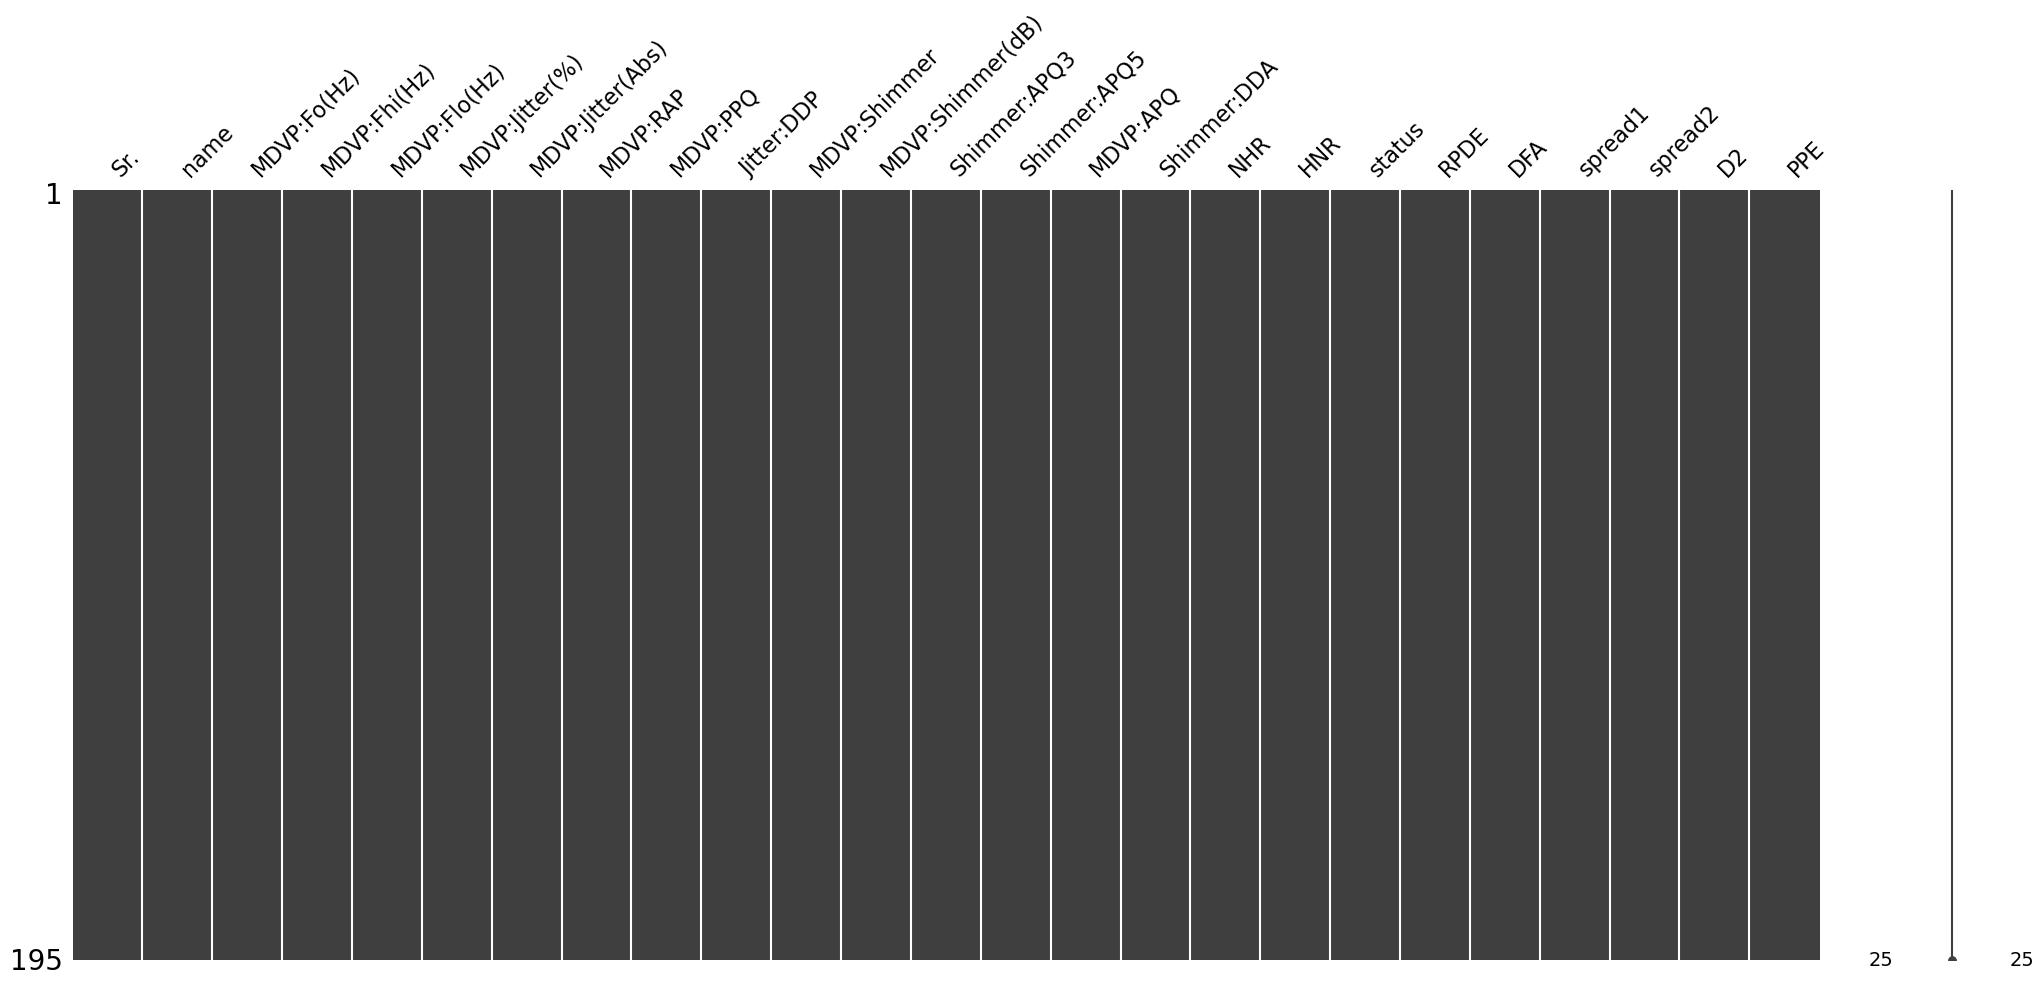

In [10]:
#matrix plot of missing values
msno.matrix(data)

<Axes: >

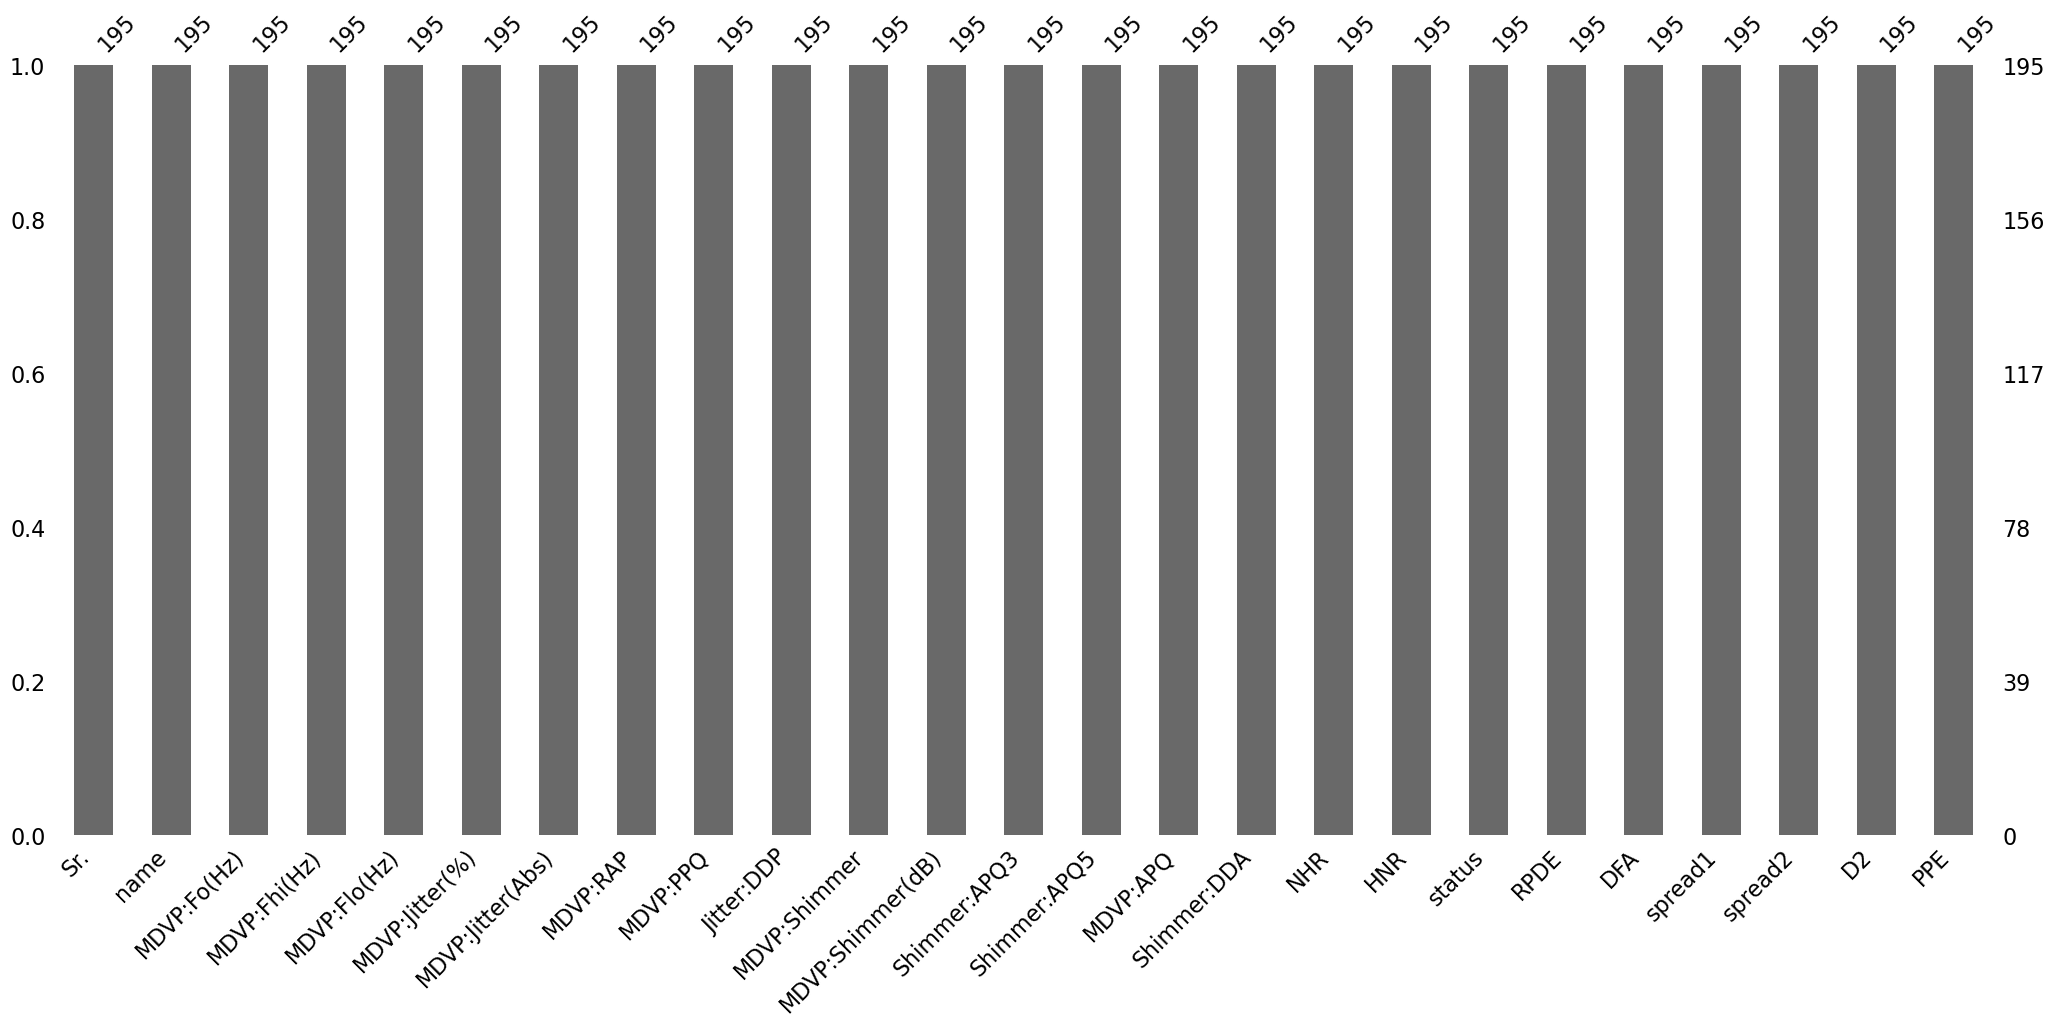

In [11]:
#bar plot of missing value
msno.bar(data)

In [12]:
data.dtypes

Sr.                   int64
name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [13]:
# Removing columns which will not contribute in model building
data=data.drop(["Sr."],axis=1)

In [14]:
# Removing columns which will not contribute in model building
data=data.drop(["name"],axis=1)

In [15]:
# '''# Iterate over column pairs
# for i in range(len(data.columns)):
#     for j in range(i + 1, len(data.columns)):
#         # Get column names
#         x_column = data.columns[i]
#         y_column = data.columns[j]

#         # Create scatter plot
#         plt.scatter(data[x_column], data[y_column])
#         plt.xlabel(x_column)
#         plt.ylabel(y_column)
#         plt.title(f"Scatter plot: {x_column} vs {y_column}")

        # Show the plot
#         plt.show()'''

In [16]:
'''x=data.corr()
sns.heatmap(x)'''

'x=data.corr()\nsns.heatmap(x)'

In [17]:
#x.status

# Visualization

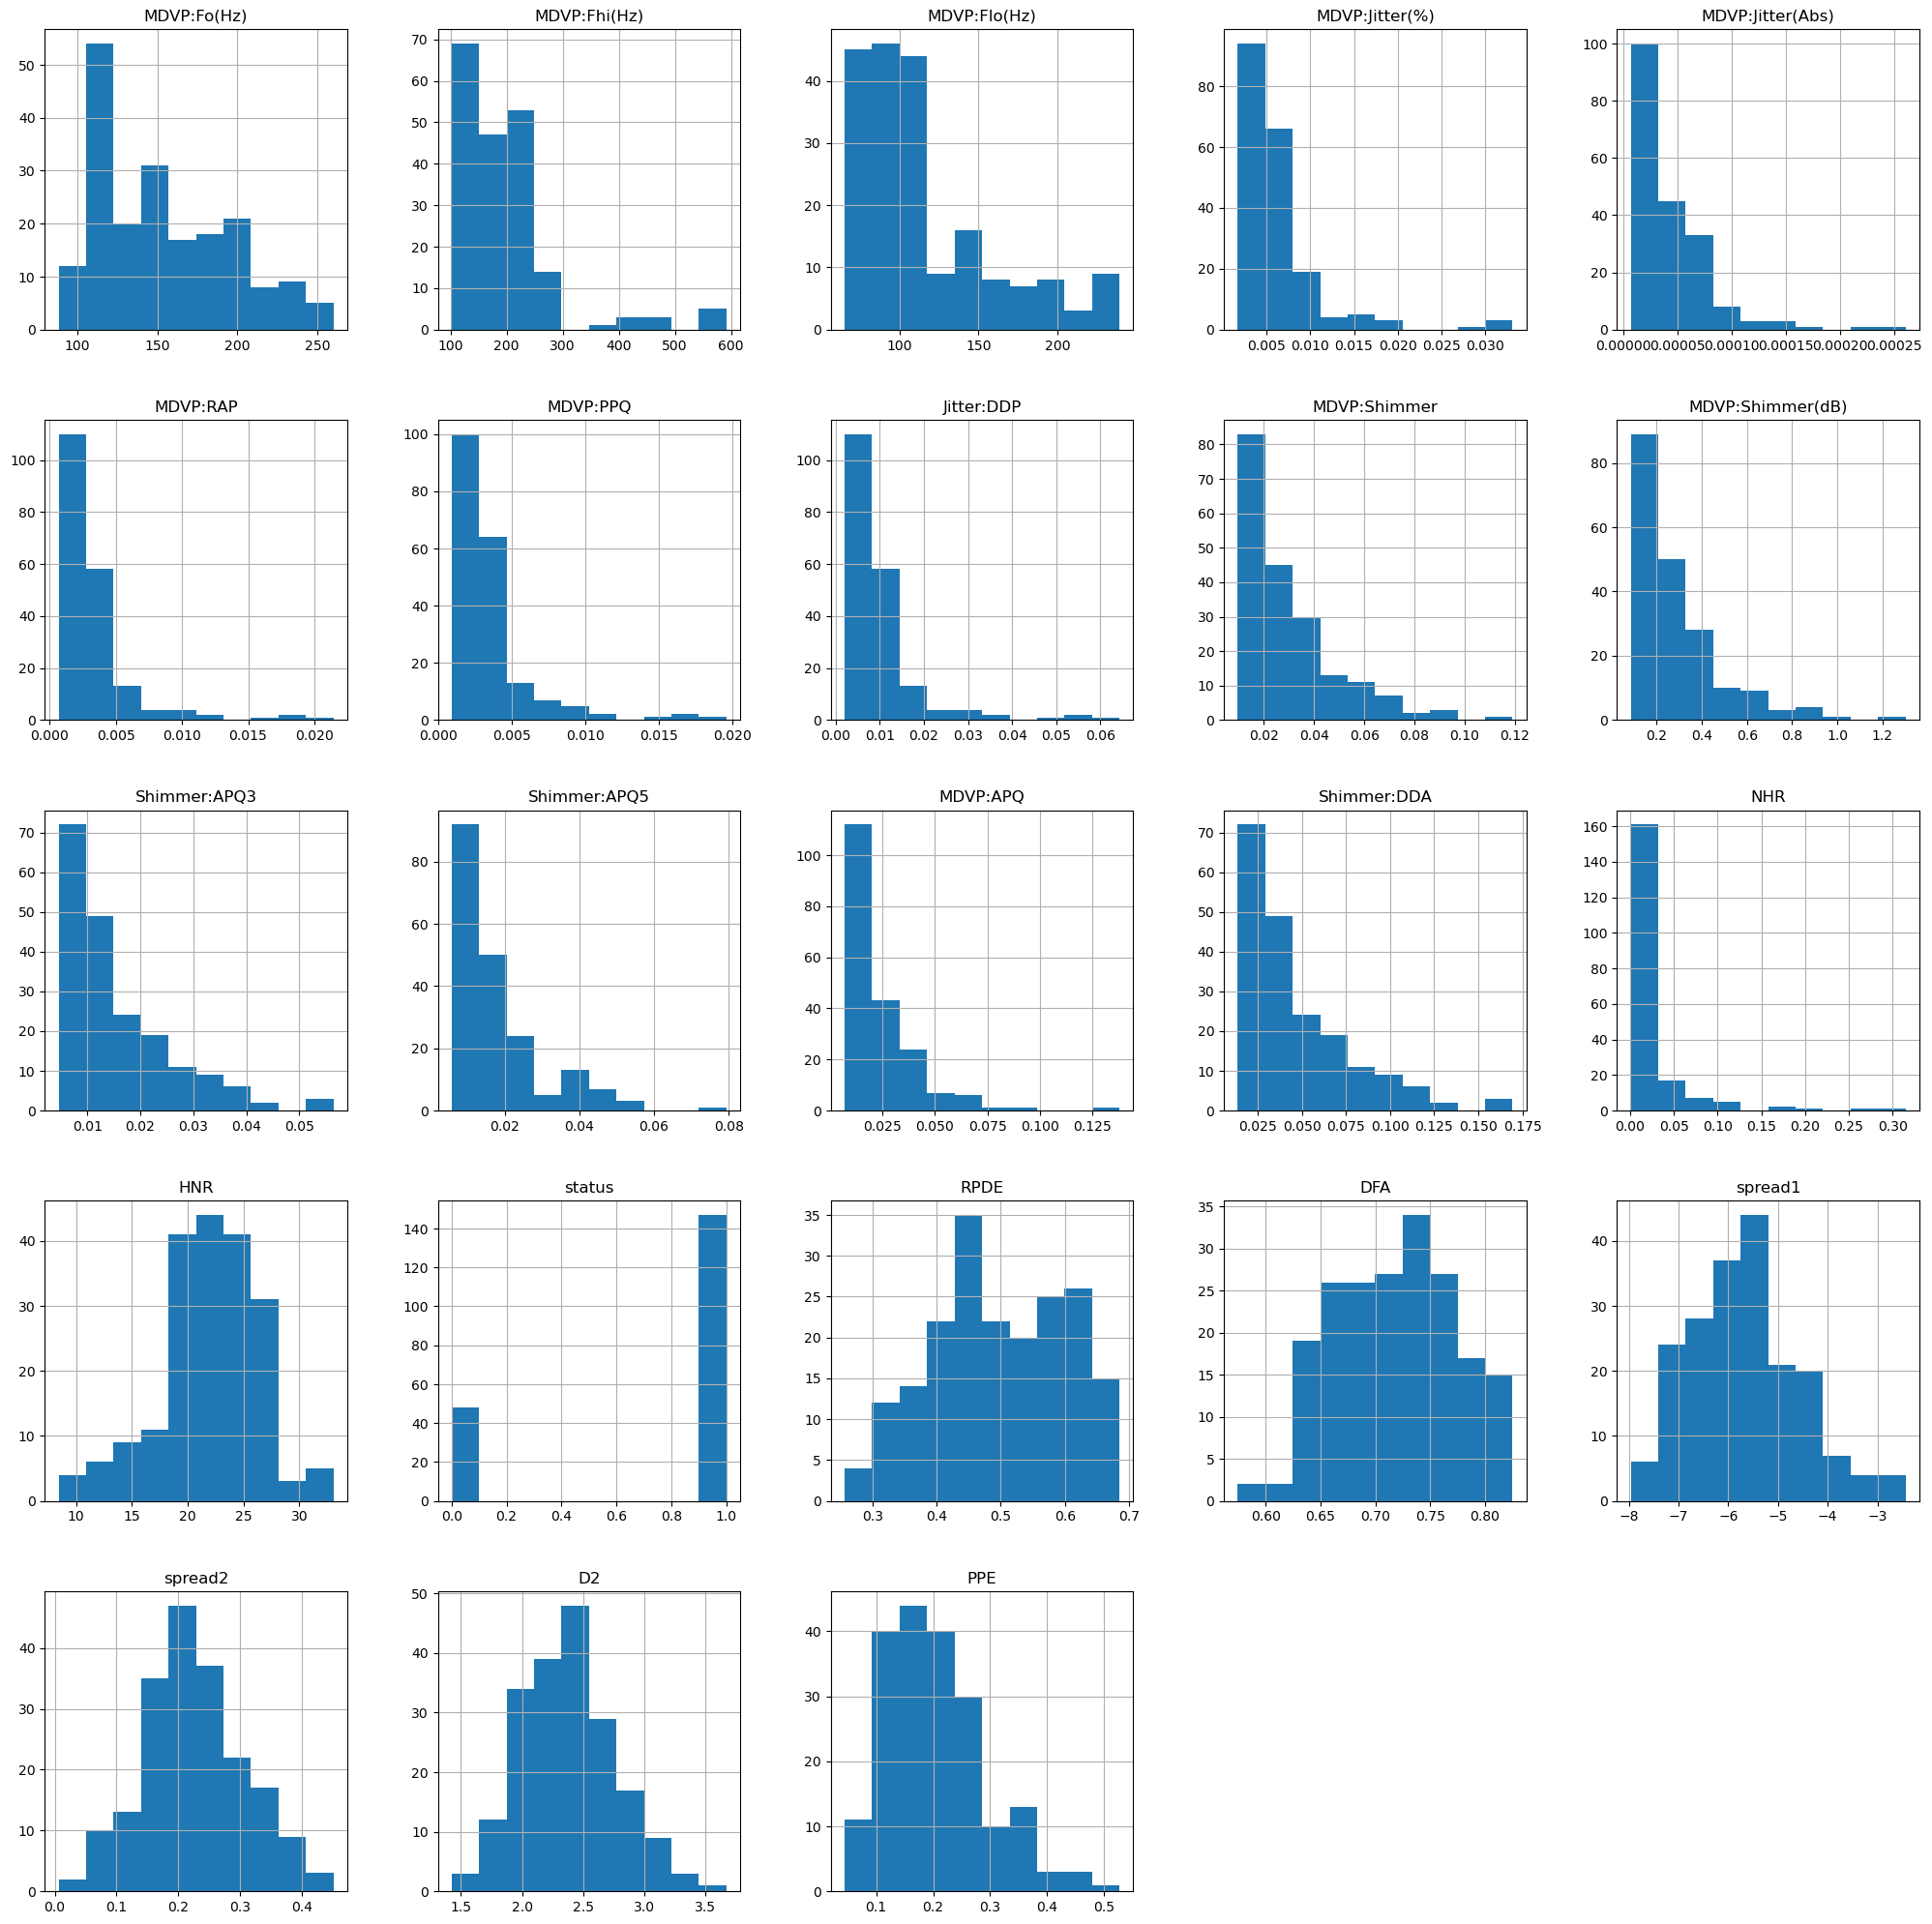

In [18]:
data.hist(figsize=(25,25))
plt.show()

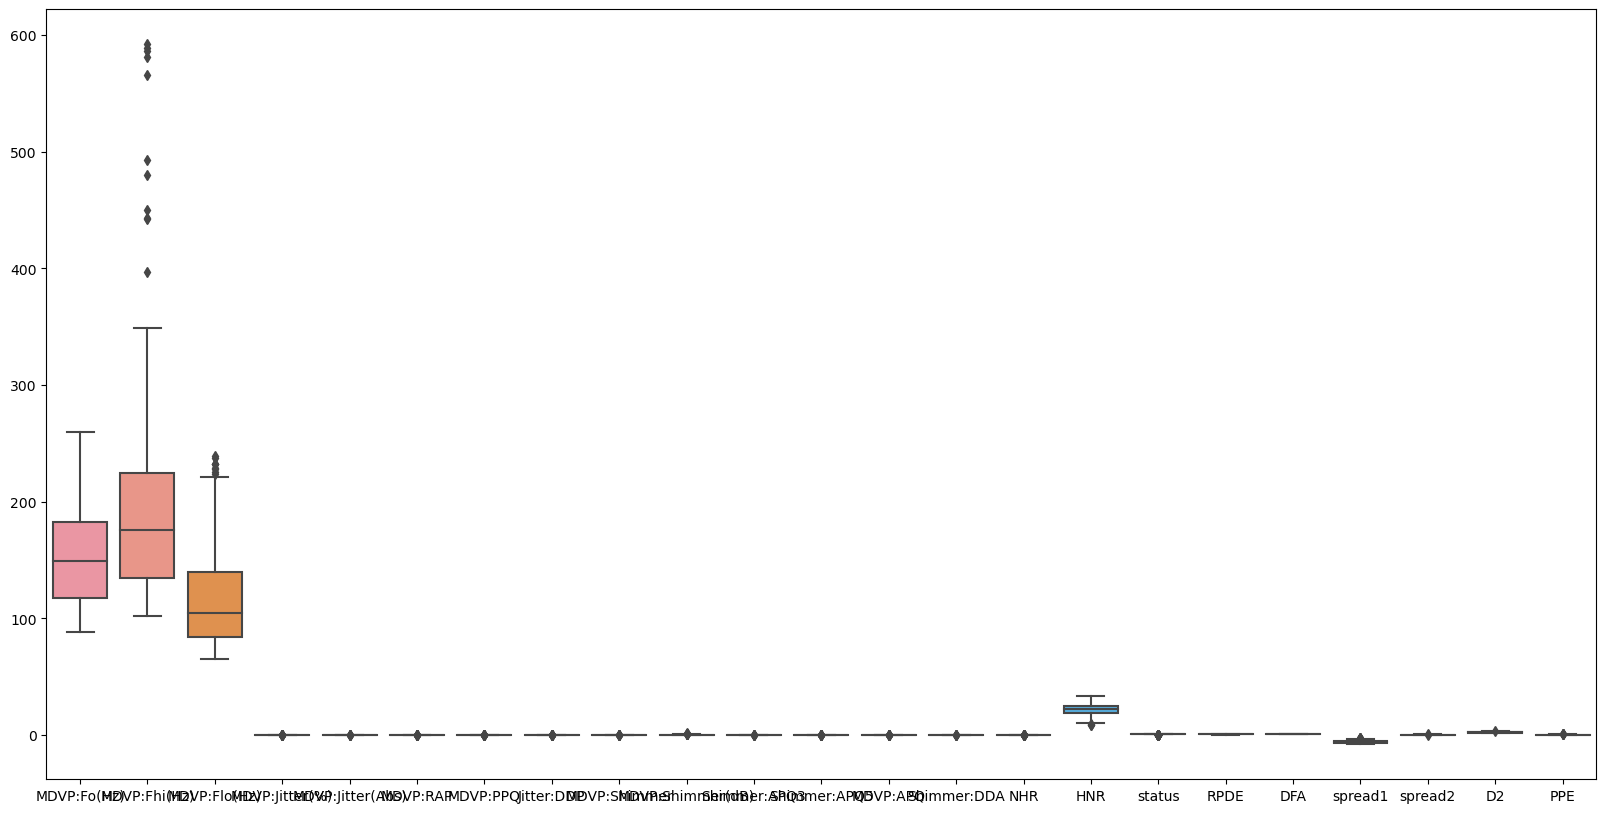

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.show()

In [20]:
data.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

# Skewness Treatment of each column

In [21]:
data.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [22]:
data["MDVP:Fhi(Hz)"]=np.log(data["MDVP:Fhi(Hz)"])
data["MDVP:Flo(Hz)"]=np.log(data["MDVP:Flo(Hz)"])
data["MDVP:Jitter(%)"]=np.log(data["MDVP:Jitter(%)"])
data["MDVP:Jitter(Abs)"]=np.log(data["MDVP:Jitter(Abs)"])
data["MDVP:RAP"]=np.log(data["MDVP:RAP"])
data["MDVP:PPQ"]=np.log(data["MDVP:PPQ"])
data["Jitter:DDP"]=np.log(data["Jitter:DDP"])
data["MDVP:Shimmer"]=np.log(data["MDVP:Shimmer"])
data["MDVP:Shimmer(dB)"]=np.log(data["MDVP:Shimmer(dB)"])
data["Shimmer:APQ3"]=np.log(data["Shimmer:APQ3"])
data["Shimmer:APQ5"]=np.log(data["Shimmer:APQ5"])
data["Shimmer:DDA"]=np.log(data["Shimmer:DDA"])
data["NHR"]=np.log(data["NHR"])
data["MDVP:Fhi(Hz)"]=np.log(data["MDVP:Fhi(Hz)"])
data["MDVP:APQ"]=np.log(data["MDVP:APQ"])

In [23]:
data.skew() #skewness coeff of each column lies within [-1,1]

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        0.863690
MDVP:Flo(Hz)        0.660379
MDVP:Jitter(%)      0.681213
MDVP:Jitter(Abs)   -0.074896
MDVP:RAP            0.705451
MDVP:PPQ            0.753483
Jitter:DDP          0.706364
MDVP:Shimmer        0.439332
MDVP:Shimmer(dB)    0.502142
Shimmer:APQ3        0.317575
Shimmer:APQ5        0.516159
MDVP:APQ            0.592517
Shimmer:DDA         0.317548
NHR                 0.318881
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

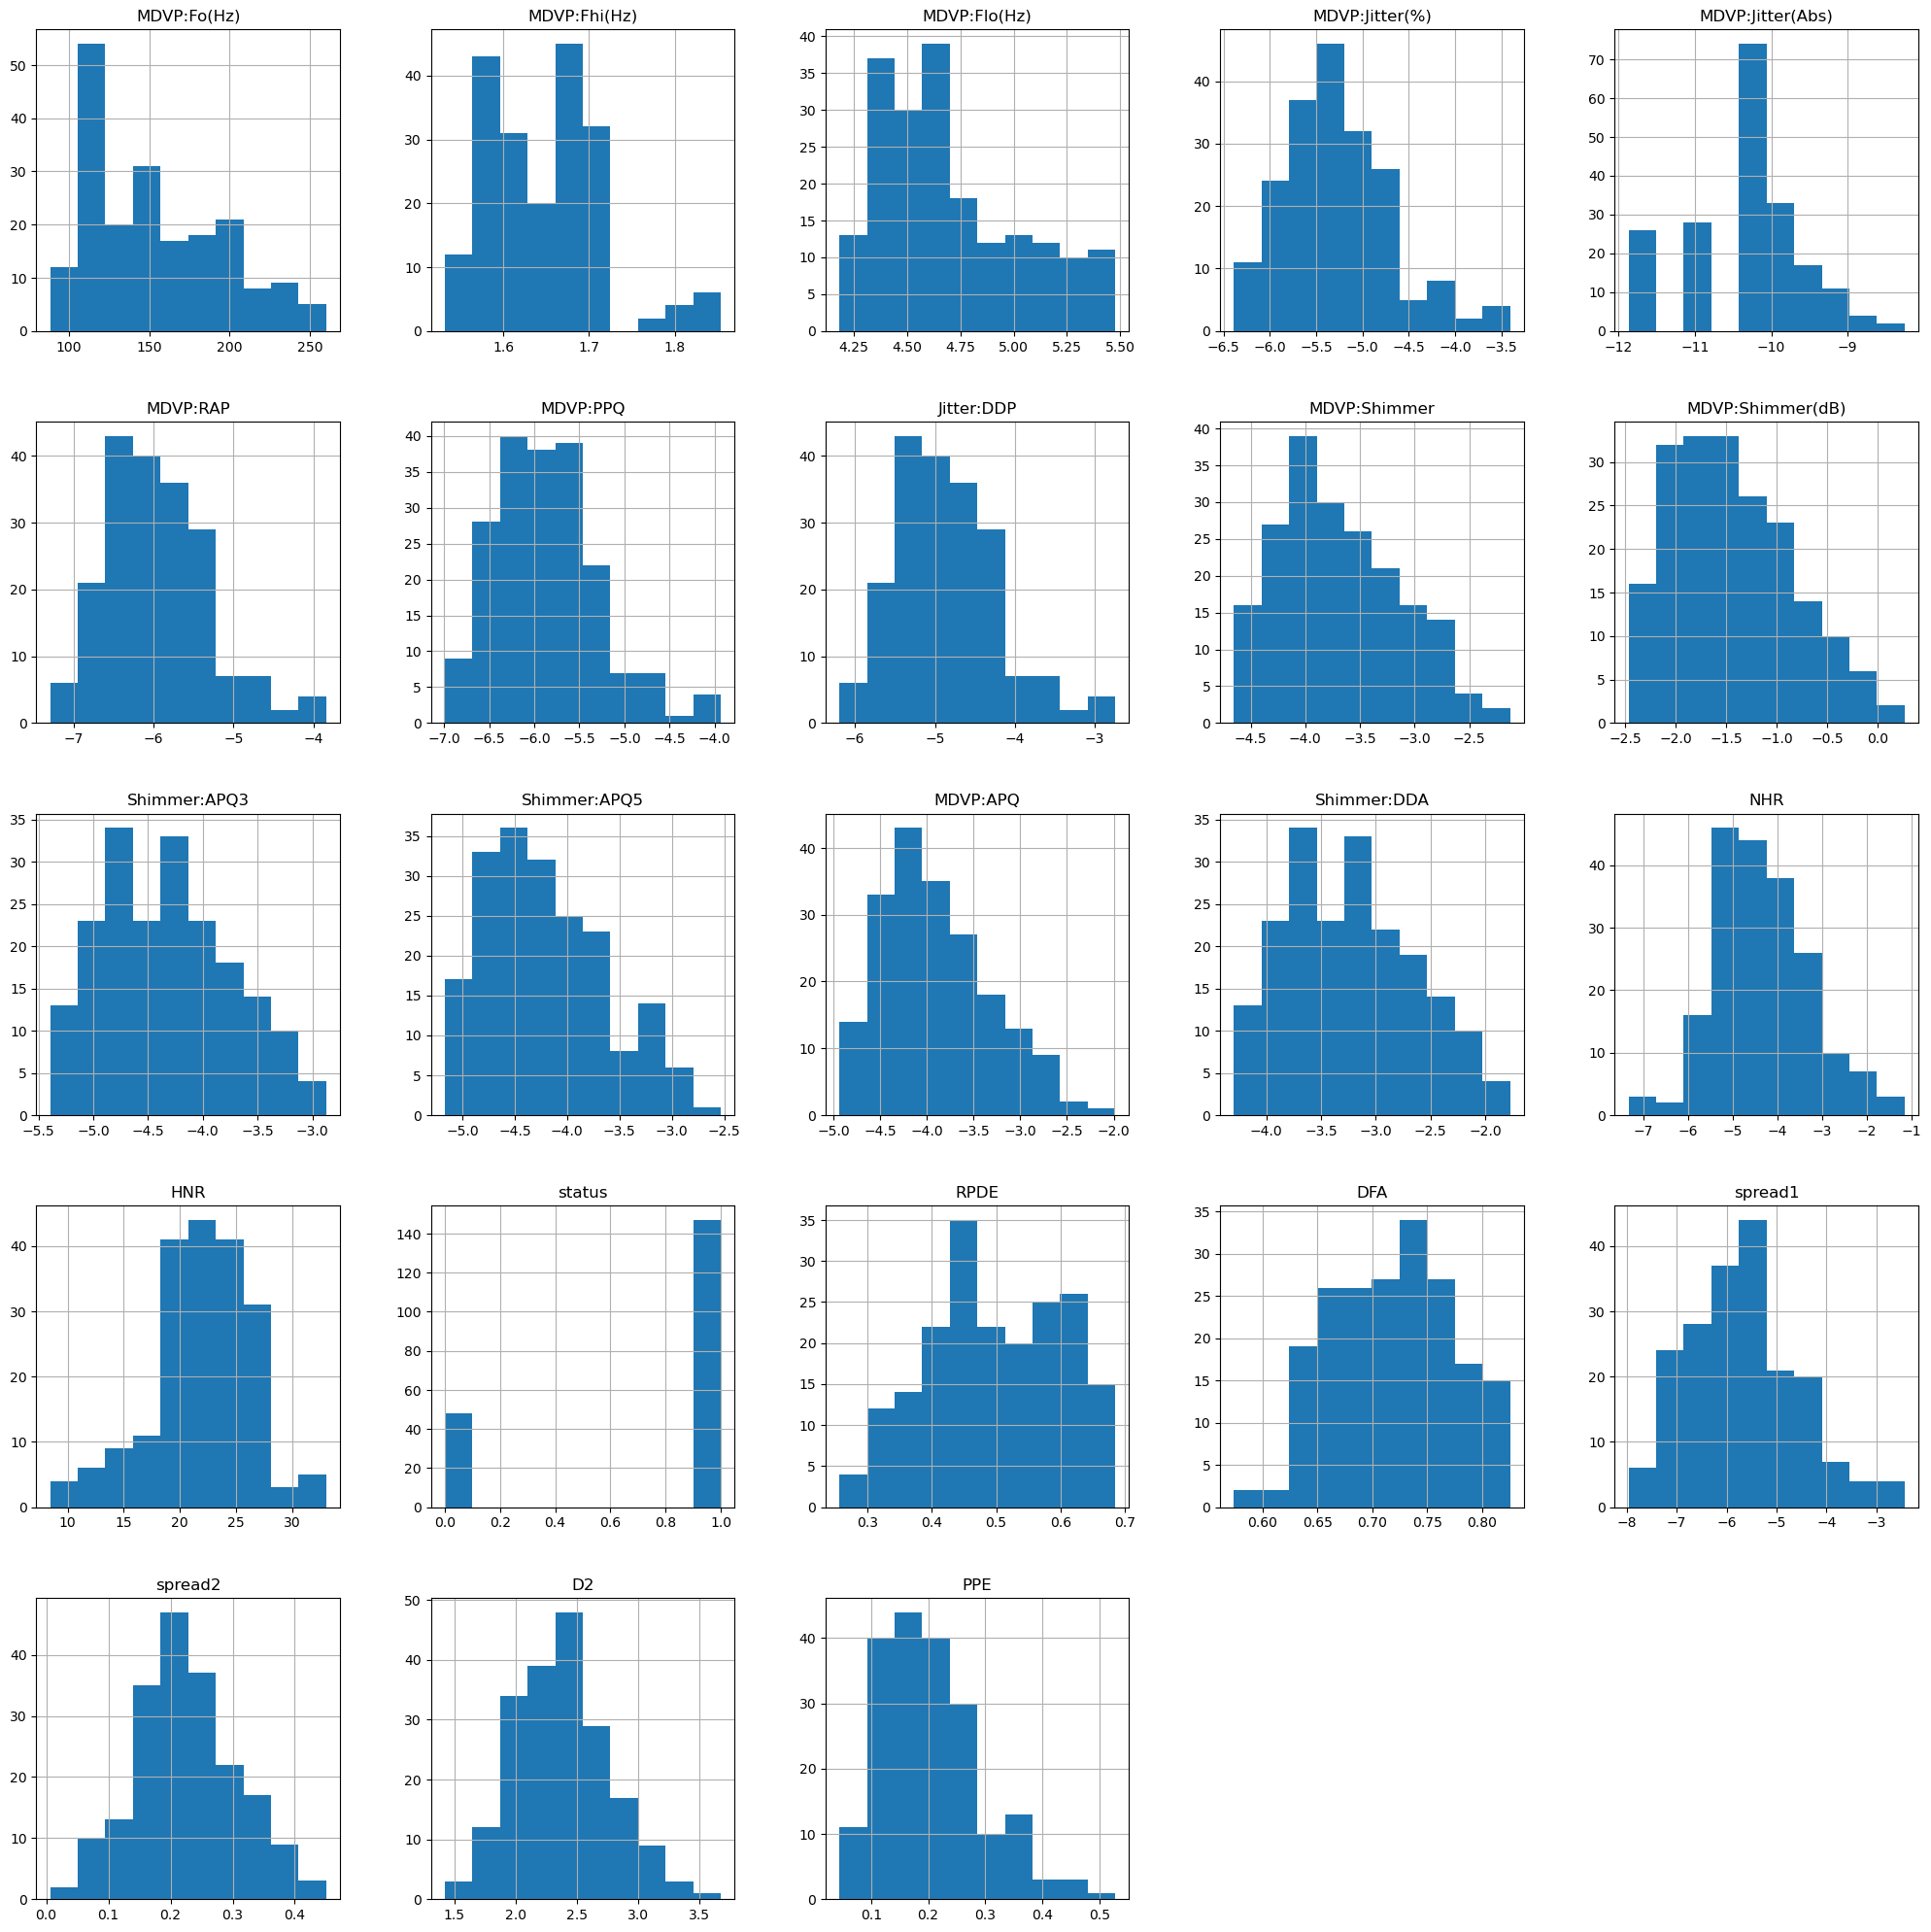

In [24]:
data.hist(figsize=(25,25))
plt.show()

# Outlier treatment of each feature

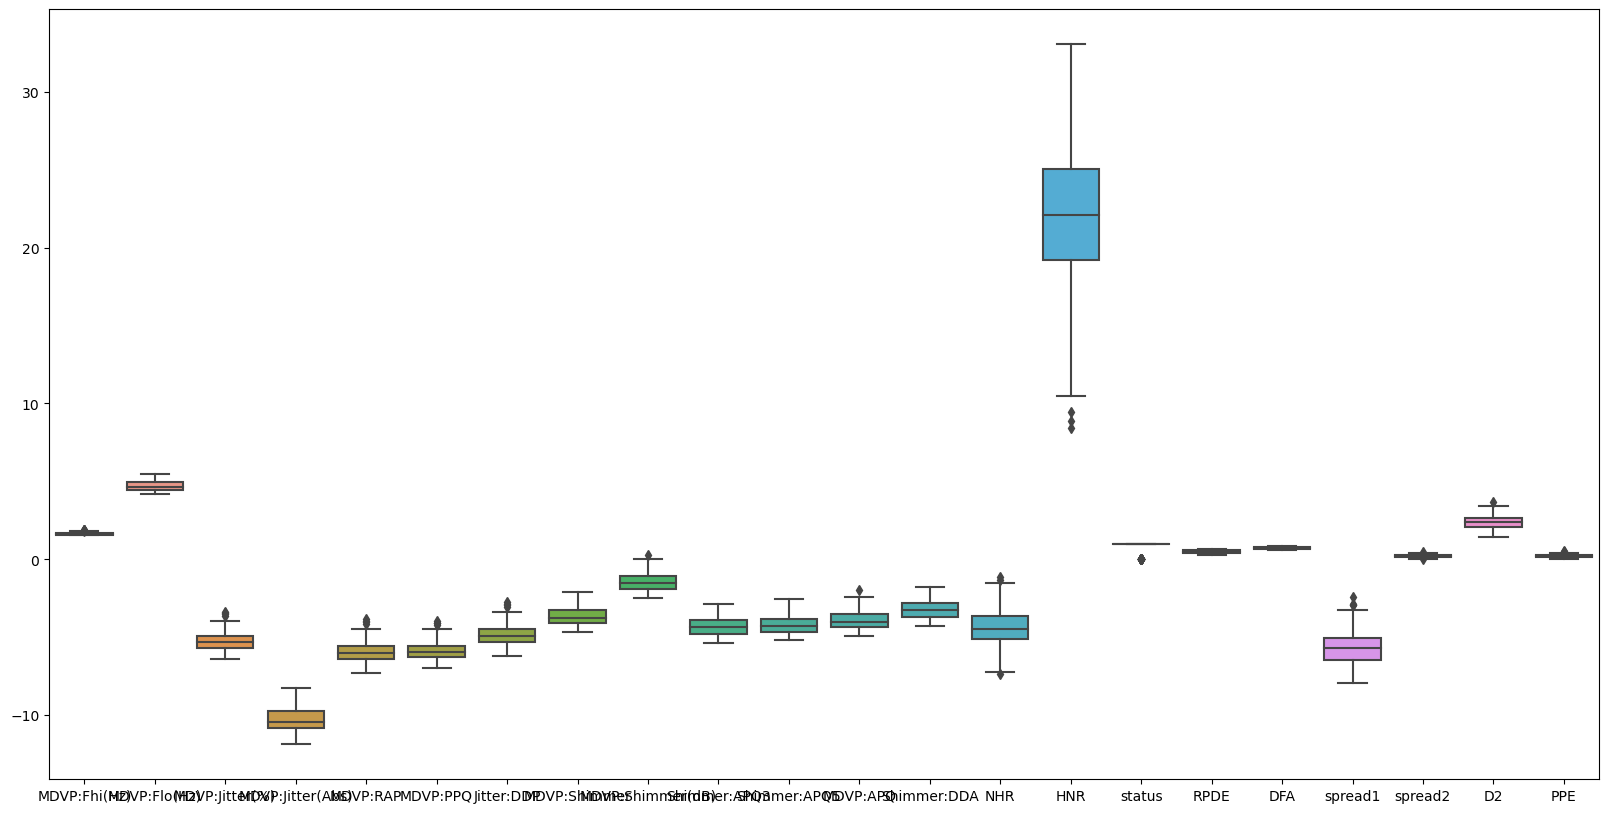

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data.drop(["MDVP:Fo(Hz)"],axis=1))
plt.show()

## MDVP:Fo(Hz)

In [26]:
iqr=data['MDVP:Fo(Hz)'].quantile(0.75)-data['MDVP:Fo(Hz)'].quantile(0.25)
iqr

65.197

In [27]:
lb=data['MDVP:Fo(Hz)'].quantile(0.25)-(iqr*1.5)
ub=data['MDVP:Fo(Hz)'].quantile(0.25)+(iqr*1.5)

In [28]:
data.loc[data['MDVP:Fo(Hz)']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
42,237.226,1.706693,5.417109,-5.815832,-11.512925,-6.383027,-6.308919,-5.284414,-4.044412,-1.807889,...,-3.472479,-4.906275,22.736,0,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
43,241.404,1.707795,5.448817,-5.874571,-11.512925,-6.456680,-6.359634,-5.360193,-4.039856,-1.870803,...,-3.500907,-4.998213,23.145,0,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
44,243.439,1.709302,5.448611,-6.165818,-11.618286,-6.821578,-6.592945,-5.722965,-4.255218,-2.071473,...,-3.759302,-5.394828,25.368,0,0.438296,0.635285,-7.057869,0.091608,2.330716,0.091470
45,242.852,1.712247,5.428955,-6.096825,-11.618286,-6.750752,-6.578452,-5.654992,-4.203713,-2.009915,...,-3.672219,-5.347508,25.032,0,0.431285,0.638928,-6.995820,0.102083,2.365800,0.102706
46,245.510,1.717159,5.446082,-6.053340,-11.512925,-6.668738,-6.515713,-5.572754,-4.130179,-1.958995,...,-3.604906,-5.347508,24.602,0,0.467489,0.631653,-7.156076,0.127642,2.392122,0.097336
47,252.455,1.716746,5.208316,-6.292570,-11.869600,-6.991137,-6.785538,-5.892525,-4.463671,-2.273026,...,-3.994861,-5.444500,26.805,0,0.610367,0.635204,-7.319510,0.200873,2.028612,0.086398
61,223.365,1.700450,4.591720,-5.936976,-11.512925,-6.475973,-6.495646,-5.379527,-3.960163,-1.801810,...,-3.493642,-5.805815,26.138,0,0.447979,0.686264,-7.293801,0.086372,2.321560,0.098555
62,222.236,1.694498,5.325422,-5.929429,-11.512925,-6.489045,-6.543112,-5.388242,-4.108646,-1.931022,...,-3.648890,-5.683980,25.856,0,0.364867,0.694399,-6.966321,0.095882,2.278687,0.103224
63,228.832,1.697076,5.410011,-5.822566,-11.512925,-6.348139,-6.469500,-5.247624,-4.108038,-1.931022,...,-3.631743,-5.652139,25.964,0,0.256570,0.683296,-7.245620,0.018689,2.498224,0.093534
64,229.401,1.710243,5.398868,-6.189915,-11.618286,-6.776727,-6.785538,-5.678115,-4.228791,-2.047943,...,-3.768789,-5.809143,26.415,0,0.276850,0.673636,-7.496264,0.056844,2.003032,0.073581


In [29]:
data['MDVP:Fo(Hz)'].loc[data['MDVP:Fo(Hz)']>ub]=ub

In [30]:
data.loc[data['MDVP:Fo(Hz)']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [31]:
data['MDVP:Fo(Hz)'].loc[data['MDVP:Fo(Hz)']<lb]=lb

## MDVP:Fhi(Hz)

In [32]:
iqr=data['MDVP:Fhi(Hz)'].quantile(0.75)-data['MDVP:Fhi(Hz)'].quantile(0.25)
iqr

0.0986195730392676

In [33]:
lb=data['MDVP:Fhi(Hz)'].quantile(0.25)-(iqr*1.5)
ub=data['MDVP:Fhi(Hz)'].quantile(0.75)+(iqr*1.5)
print(lb,ub)

1.4421736993889471 1.8366519915460175


In [34]:
data.loc[data['MDVP:Fhi(Hz)']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
73,112.014,1.852793,4.673053,-5.234404,-9.903488,-5.921938,-5.716868,-4.822083,-3.709899,-1.487220,...,-3.189317,-5.078379,24.178,1,0.509127,0.789532,-5.389129,0.306636,1.928708,0.225461
102,139.224,1.852272,4.192031,-3.502898,-8.421883,-3.987825,-4.117818,-2.889033,-2.362441,-0.072571,...,-1.792520,-1.349770,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
149,202.632,1.846584,5.177606,-4.118432,-9.433484,-4.689639,-4.642872,-3.591390,-2.635265,-0.182722,...,-2.249424,-2.539701,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
186,116.556,1.853726,4.456995,-5.306350,-10.126631,-5.975591,-5.940771,-4.876979,-4.098353,-1.870803,...,-3.705009,-4.270843,23.958,0,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
187,116.342,1.850853,4.545908,-5.925677,-10.819778,-6.767993,-6.515713,-5.669381,-4.342806,-2.145581,...,-3.967536,-4.990833,25.023,0,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868


In [35]:
data['MDVP:Fhi(Hz)'].loc[data['MDVP:Fhi(Hz)']>ub]=ub

In [36]:
data.loc[data['MDVP:Fhi(Hz)']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [37]:
data['MDVP:Fhi(Hz)'].loc[data['MDVP:Fhi(Hz)']<lb]=lb

## MDVP:Flo(Hz)

In [38]:
iqr=data['MDVP:Flo(Hz)'].quantile(0.75)-data['MDVP:Flo(Hz)'].quantile(0.25)
iqr

0.5074758555726344

In [39]:
lb=data['MDVP:Flo(Hz)'].quantile(0.25)-(iqr*1.5)
ub=data['MDVP:Flo(Hz)'].quantile(0.75)+(iqr*1.5)
print(lb,ub)

3.673057939200892 5.70296136149143


In [40]:
data.loc[data['MDVP:Flo(Hz)']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [41]:
data['MDVP:Flo(Hz)'].loc[data['MDVP:Flo(Hz)']>ub]=ub

In [42]:
data.loc[data['MDVP:Flo(Hz)']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [43]:
data['MDVP:Flo(Hz)'].loc[data['MDVP:Flo(Hz)']<lb]=lb

## MDVP:Jitter(%)

In [44]:
iqr=data['MDVP:Jitter(%)'].quantile(0.75)-data['MDVP:Jitter(%)'].quantile(0.25)
iqr

0.755459168984709

In [45]:
lb=data['MDVP:Jitter(%)'].quantile(0.25)-(iqr*1.5)
ub=data['MDVP:Jitter(%)'].quantile(0.75)+(iqr*1.5)
print(lb,ub)

-6.799675443389567 -3.7778387674507314


In [46]:
data.loc[data['MDVP:Jitter(%)']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
100,125.641,1.599234,4.756569,-3.406411,-8.254829,-3.842497,-4.185145,-2.743729,-2.388361,-0.115411,...,-1.827967,-1.155754,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,139.224,1.836652,4.192031,-3.502898,-8.421883,-3.987825,-4.117818,-2.889033,-2.362441,-0.072571,...,-1.792520,-1.349770,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
151,192.818,1.688907,5.128673,-3.471513,-8.740337,-4.017384,-3.933247,-2.918586,-2.127960,0.263902,...,-1.775374,-1.527259,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,198.116,1.695884,5.161799,-3.606747,-8.873868,-4.155369,-4.075130,-3.056544,-2.443688,0.017840,...,-2.051749,-1.816155,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


In [47]:
data['MDVP:Jitter(%)'].loc[data['MDVP:Jitter(%)']>ub]=ub

In [48]:
data.loc[data['MDVP:Jitter(%)']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [49]:
data['MDVP:Jitter(%)'].loc[data['MDVP:Jitter(%)']<lb]=lb

## MDVP:Jitter(Abs)

In [50]:
iqr=data['MDVP:Jitter(Abs)'].quantile(0.75)-data['MDVP:Jitter(Abs)'].quantile(0.25)
iqr

1.0986122886681091

In [51]:
lb=data['MDVP:Jitter(Abs)'].quantile(0.25)-(iqr*1.5)
ub=data['MDVP:Jitter(Abs)'].quantile(0.75)+(iqr*1.5)
print(lb,ub)

-12.467696717412448 -8.073247562740011


In [52]:
data.loc[data['MDVP:Jitter(Abs)']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [53]:
data['MDVP:Jitter(Abs)'].loc[data['MDVP:Jitter(Abs)']>ub]=ub

In [54]:
data.loc[data['MDVP:Jitter(Abs)']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [55]:
data['MDVP:Jitter(Abs)'].loc[data['MDVP:Jitter(Abs)']<lb]=lb

## MDVP:RAP

In [56]:
iqr=data['MDVP:RAP'].quantile(0.75)-data['MDVP:RAP'].quantile(0.25)
iqr

0.8373101845185627

In [57]:
lb=data['MDVP:RAP'].quantile(0.25)-(iqr*1.5)
ub=data['MDVP:RAP'].quantile(0.75)+(iqr*1.5)
print(lb,ub)

-7.656902953391529 -4.307662215317278


In [58]:
data.loc[data['MDVP:RAP']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
100,125.641,1.599234,4.756569,-3.777839,-8.254829,-3.842497,-4.185145,-2.743729,-2.388361,-0.115411,...,-1.827967,-1.155754,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,139.224,1.836652,4.192031,-3.777839,-8.421883,-3.987825,-4.117818,-2.889033,-2.362441,-0.072571,...,-1.792520,-1.349770,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
151,192.818,1.688907,5.128673,-3.777839,-8.740337,-4.017384,-3.933247,-2.918586,-2.127960,0.263902,...,-1.775374,-1.527259,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,198.116,1.695884,5.161799,-3.777839,-8.873868,-4.155369,-4.075130,-3.056544,-2.443688,0.017840,...,-2.051749,-1.816155,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


In [59]:
data['MDVP:RAP'].loc[data['MDVP:RAP']>ub]=ub

In [60]:
data.loc[data['MDVP:RAP']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [61]:
data['MDVP:RAP'].loc[data['MDVP:RAP']<lb]=lb

## MDVP:PPQ

In [62]:
iqr=data['MDVP:PPQ'].quantile(0.75)-data['MDVP:PPQ'].quantile(0.25)
iqr

0.7544033143646001

In [63]:
lb=data['MDVP:PPQ'].quantile(0.25)-(iqr*1.5)
ub=data['MDVP:PPQ'].quantile(0.75)+(iqr*1.5)
print(lb,ub)

-7.418783762803927 -4.401170505345527


In [64]:
data.loc[data['MDVP:PPQ']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
100,125.641,1.599234,4.756569,-3.777839,-8.254829,-4.307662,-4.185145,-2.743729,-2.388361,-0.115411,...,-1.827967,-1.155754,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,139.224,1.836652,4.192031,-3.777839,-8.421883,-4.307662,-4.117818,-2.889033,-2.362441,-0.072571,...,-1.792520,-1.349770,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
151,192.818,1.688907,5.128673,-3.777839,-8.740337,-4.307662,-3.933247,-2.918586,-2.127960,0.263902,...,-1.775374,-1.527259,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,198.116,1.695884,5.161799,-3.777839,-8.873868,-4.307662,-4.075130,-3.056544,-2.443688,0.017840,...,-2.051749,-1.816155,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


In [65]:
data['MDVP:PPQ'].loc[data['MDVP:PPQ']>ub]=ub

In [66]:
data.loc[data['MDVP:PPQ']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [67]:
data['MDVP:PPQ'].loc[data['MDVP:PPQ']<lb]=lb

## Jitter:DDP

In [68]:
iqr=data['Jitter:DDP'].quantile(0.75)-data['Jitter:DDP'].quantile(0.25)
iqr

0.836307175155131

In [69]:
lb=data['Jitter:DDP'].quantile(0.25)-(iqr*1.5)
ub=data['Jitter:DDP'].quantile(0.75)+(iqr*1.5)
print(lb,ub)

-6.555783141314839 -3.210554440694315


In [70]:
data.loc[data['Jitter:DDP']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
100,125.641,1.599234,4.756569,-3.777839,-8.254829,-4.307662,-4.401171,-2.743729,-2.388361,-0.115411,...,-1.827967,-1.155754,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,139.224,1.836652,4.192031,-3.777839,-8.421883,-4.307662,-4.401171,-2.889033,-2.362441,-0.072571,...,-1.792520,-1.349770,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
151,192.818,1.688907,5.128673,-3.777839,-8.740337,-4.307662,-4.401171,-2.918586,-2.127960,0.263902,...,-1.775374,-1.527259,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,198.116,1.695884,5.161799,-3.777839,-8.873868,-4.307662,-4.401171,-3.056544,-2.443688,0.017840,...,-2.051749,-1.816155,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


In [71]:
data['Jitter:DDP'].loc[data['Jitter:DDP']>ub]=ub

In [72]:
data.loc[data['Jitter:DDP']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [73]:
data['Jitter:DDP'].loc[data['Jitter:DDP']<lb]=lb

## MDVP:Shimmer

In [74]:
iqr=data['MDVP:Shimmer'].quantile(0.75)-data['MDVP:Shimmer'].quantile(0.25)
iqr

0.8308835413850497

In [75]:
lb=data['MDVP:Shimmer'].quantile(0.25)-(iqr*1.5)
ub=data['MDVP:Shimmer'].quantile(0.75)+(iqr*1.5)
print(lb,ub)

-5.3504249805264585 -2.02689081498626


In [76]:
data.loc[data['MDVP:Shimmer']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [77]:
data['MDVP:Shimmer'].loc[data['MDVP:Shimmer']>ub]=ub

In [78]:
data.loc[data['MDVP:Shimmer']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [79]:
data['MDVP:Shimmer'].loc[data['MDVP:Shimmer']<lb]=lb

## MDVP:Shimmer(dB)

In [80]:
iqr=data['MDVP:Shimmer(dB)'].quantile(0.75)-data['MDVP:Shimmer(dB)'].quantile(0.25)
iqr

0.8573538646286722

In [81]:
lb=data['MDVP:Shimmer(dB)'].quantile(0.25)-(iqr*1.5)
ub=data['MDVP:Shimmer(dB)'].quantile(0.75)+(iqr*1.5)
print(lb,ub)

-3.193206786070358 0.23620867244433041


In [82]:
data.loc[data['MDVP:Shimmer(dB)']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
151,192.818,1.688907,5.128673,-3.777839,-8.740337,-4.307662,-4.401171,-3.210554,-2.12796,0.263902,...,-1.775374,-1.527259,8.441,1,0.625866,0.76832,-2.434031,0.450493,3.079221,0.527367


In [83]:
data['MDVP:Shimmer(dB)'].loc[data['MDVP:Shimmer(dB)']>ub]=ub

In [84]:
data.loc[data['MDVP:Shimmer(dB)']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [85]:
data['MDVP:Shimmer(dB)'].loc[data['MDVP:Shimmer(dB)']<lb]=lb

## Shimmer:APQ3

In [86]:
iqr=data['Shimmer:APQ3'].quantile(0.75)-data['Shimmer:APQ3'].quantile(0.25)
iqr

0.8992995153542003

In [87]:
lb=data['Shimmer:APQ3'].quantile(0.25)-(iqr*1.5)
ub=data['Shimmer:APQ3'].quantile(0.75)+(iqr*1.5)
print(lb,ub)

-6.147112490304732 -2.549914428887931


In [88]:
data.loc[data['Shimmer:APQ3']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [89]:
data['Shimmer:APQ3'].loc[data['Shimmer:APQ3']>ub]=ub

In [90]:
data.loc[data['Shimmer:APQ3']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [91]:
data['Shimmer:APQ3'].loc[data['Shimmer:APQ3']<lb]=lb

## Shimmer:APQ5

In [92]:
iqr=data['Shimmer:APQ5'].quantile(0.75)-data['Shimmer:APQ5'].quantile(0.25)
iqr

0.8484857641362469

In [93]:
lb=data['Shimmer:APQ5'].quantile(0.25)-(iqr*1.5)
ub=data['Shimmer:APQ5'].quantile(0.75)+(iqr*1.5)
print(lb,ub)

-5.9208068780064025 -2.5268638214614145


In [94]:
data.loc[data['Shimmer:APQ5']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [95]:
data['Shimmer:APQ5'].loc[data['Shimmer:APQ5']>ub]=ub

In [96]:
data.loc[data['Shimmer:APQ5']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [97]:
data['Shimmer:APQ5'].loc[data['Shimmer:APQ5']<lb]=lb

## MDVP:APQ

In [98]:
iqr=data['MDVP:APQ'].quantile(0.75)-data['MDVP:APQ'].quantile(0.25)
iqr

0.8099059349960234

In [99]:
lb=data['MDVP:APQ'].quantile(0.25)-(iqr*1.5)
ub=data['MDVP:APQ'].quantile(0.75)+(iqr*1.5)
print(lb,ub)

-5.551530127697202 -2.3119063877131087


In [100]:
data.loc[data['MDVP:APQ']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
151,192.818,1.688907,5.128673,-3.777839,-8.740337,-4.307662,-4.401171,-3.210554,-2.12796,0.236209,...,-1.775374,-1.527259,8.441,1,0.625866,0.76832,-2.434031,0.450493,3.079221,0.527367


In [101]:
data['MDVP:APQ'].loc[data['MDVP:APQ']>ub]=ub

In [102]:
data.loc[data['MDVP:APQ']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [103]:
data['MDVP:APQ'].loc[data['MDVP:APQ']<lb]=lb

## Shimmer:DDA

In [104]:
iqr=data['Shimmer:DDA'].quantile(0.75)-data['Shimmer:DDA'].quantile(0.25)
iqr

0.8992990553978757

In [105]:
lb=data['Shimmer:DDA'].quantile(0.25)-(iqr*1.5)
ub=data['Shimmer:DDA'].quantile(0.75)+(iqr*1.5)
print(lb,ub)

-5.048499511702135 -1.4513032901106326


In [106]:
data.loc[data['Shimmer:DDA']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [107]:
data['Shimmer:DDA'].loc[data['Shimmer:DDA']>ub]=ub

In [108]:
data.loc[data['Shimmer:DDA']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [109]:
data['Shimmer:DDA'].loc[data['Shimmer:DDA']<lb]=lb

## NHR

In [110]:
iqr=data['NHR'].quantile(0.75)-data['NHR'].quantile(0.25)
iqr

1.46488866943303

In [111]:
lb=data['NHR'].quantile(0.25)-(iqr*1.5)
ub=data['NHR'].quantile(0.75)+(iqr*1.5)
print(lb,ub)
#tukeys

-7.325916497897076 -1.4663618201649555


In [112]:
data.loc[data['NHR']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
100,125.641,1.599234,4.756569,-3.777839,-8.254829,-4.307662,-4.401171,-3.210554,-2.388361,-0.115411,...,-1.827967,-1.155754,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,139.224,1.836652,4.192031,-3.777839,-8.421883,-4.307662,-4.401171,-3.210554,-2.362441,-0.072571,...,-1.792520,-1.349770,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774


In [113]:
data['NHR'].loc[data['NHR']>ub]=ub

In [114]:
data.loc[data['NHR']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
34,203.184,1.677909,5.278931,-6.331142,-11.618286,-6.969631,-6.849486,-5.867479,-4.648078,-2.465104,...,-4.266557,-7.338538,33.047,0,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539


In [115]:
data['NHR'].loc[data['NHR']<lb]=lb

## HNR

In [116]:
iqr=data['HNR'].quantile(0.75)-data['HNR'].quantile(0.25)
iqr

5.877499999999998

In [117]:
lb=data.HNR.quantile(0.25)-(iqr*1.5)
ub=data.HNR.quantile(0.25)+(iqr*1.5)
print(lb,ub)

10.381750000000004 28.014249999999997


In [118]:
data.loc[data['HNR']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
31,199.228,1.676121,5.257969,-6.028129,-11.512925,-6.615086,-6.585672,-5.516473,-4.590282,-2.419119,...,-4.191076,-6.394932,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
32,198.383,1.681122,5.263229,-6.156339,-11.512925,-6.785538,-6.607651,-5.686925,-4.371680,-2.198225,...,-3.953366,-6.733802,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
33,202.266,1.677978,5.283605,-6.319969,-11.618286,-6.980326,-6.840097,-5.885304,-4.652262,-2.465104,...,-4.263710,-7.236259,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
34,203.184,1.677909,5.278931,-6.331142,-11.618286,-6.969631,-6.849486,-5.867479,-4.648078,-2.465104,...,-4.266557,-7.325916,33.047,0,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539
35,201.464,1.677058,5.276624,-6.224658,-11.512925,-6.858965,-6.767993,-5.763532,-4.427861,-2.234926,...,-4.040993,-6.607651,31.732,0,0.344252,0.742737,-7.777685,0.170183,2.447064,0.057610
104,154.003,1.624689,4.856870,-6.303439,-11.512925,-7.182192,-6.907755,-6.079203,-4.575611,-2.364460,...,-4.264421,-6.019864,28.409,1,0.263654,0.691483,-7.111576,0.144780,2.065477,0.093193
106,155.078,1.628898,4.970841,-6.388961,-11.512925,-7.293418,-6.991137,-6.194805,-4.543135,-2.333044,...,-4.156007,-6.061887,29.746,1,0.334171,0.677930,-6.981201,0.184550,2.129924,0.106802
108,151.989,1.621051,4.889273,-6.353870,-11.512925,-7.195437,-6.948577,-6.096825,-4.581454,-2.375156,...,-4.294749,-6.040655,29.928,1,0.311369,0.676066,-6.739151,0.160686,2.296873,0.115130


In [119]:
data['HNR'].loc[data['HNR']>ub]=ub

In [120]:
data.loc[data['HNR']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
100,125.641,1.599234,4.756569,-3.777839,-8.254829,-4.307662,-4.401171,-3.210554,-2.388361,-0.115411,...,-1.827967,-1.466362,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
151,192.818,1.688907,5.128673,-3.777839,-8.740337,-4.307662,-4.401171,-3.210554,-2.127960,0.236209,...,-1.775374,-1.527259,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,198.116,1.695884,5.161799,-3.777839,-8.873868,-4.307662,-4.401171,-3.210554,-2.443688,0.017840,...,-2.051749,-1.816155,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


In [121]:
data['HNR'].loc[data['HNR']<lb]=lb

## RPDE

In [122]:
iqr=data['RPDE'].quantile(0.75)-data['RPDE'].quantile(0.25)
iqr

0.16625649999999997

In [123]:
lb=data.RPDE.quantile(0.25)-(iqr*1.5)
ub=data.RPDE.quantile(0.25)+(iqr*1.5)
print(lb,ub)

0.17192125000000005 0.67069075


In [124]:
data.loc[data['RPDE']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
100,125.641,1.599234,4.756569,-3.777839,-8.254829,-4.307662,-4.401171,-3.210554,-2.388361,-0.115411,...,-1.827967,-1.466362,10.38175,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
140,170.368,1.721686,4.376298,-5.165536,-10.414313,-6.066188,-5.918214,-4.967576,-3.419463,-1.269401,...,-2.968312,-3.694898,18.54000,1,0.677131,0.685057,-4.796845,0.397749,2.963799,0.277227
162,114.554,1.577418,4.512188,-5.034416,-9.721166,-5.610292,-5.683980,-4.512591,-3.308254,-0.996959,...,-2.883833,-3.609329,18.95400,1,0.685151,0.719576,-5.529833,0.242750,2.408689,0.220520
164,102.273,1.601739,4.453207,-4.702783,-9.315701,-5.312416,-5.379527,-4.213128,-3.570563,-1.301953,...,-3.049977,-3.248820,18.44700,1,0.671378,0.674562,-2.929379,0.396746,2.560422,0.367233


In [125]:
data['RPDE'].loc[data['RPDE']>ub]=ub

In [126]:
data.loc[data['RPDE']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [127]:
data['RPDE'].loc[data['RPDE']<lb]=lb

## DFA

In [128]:
iqr=data['DFA'].quantile(0.75)-data['DFA'].quantile(0.25)
iqr

0.08712399999999998

In [129]:
lb=data.DFA.quantile(0.25)-(iqr*1.5)
ub=data.DFA.quantile(0.25)+(iqr*1.5)
print(lb,ub)

0.5440715 0.8054435


In [130]:
data.loc[data['DFA']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,1.621004,4.317448,-4.848516,-9.567015,-5.599422,-5.195761,-4.501711,-3.129492,-0.853316,...,-2.726469,-3.811725,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,1.609757,4.734609,-4.637693,-9.433484,-5.370888,-4.967576,-4.272993,-2.791323,-0.468405,...,-2.364141,-3.948168,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,1.584334,4.714518,-4.556380,-9.315701,-5.213976,-4.852350,-4.114751,-2.950185,-0.729811,...,-2.492536,-4.335907,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,1.594592,4.712822,-4.608175,-9.315701,-5.294325,-4.964706,-4.196377,-2.901878,-0.659712,...,-2.433719,-4.302846,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,1.600253,4.706417,-4.355190,-9.115030,-5.028290,-4.701681,-3.929169,-2.744974,-0.537854,...,-2.256656,-4.035887,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,1.584414,4.734328,-4.637693,-9.433484,-5.375198,-4.892852,-4.277306,-3.057395,-0.785262,...,-2.661405,-4.404681,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
54,108.807,1.589791,4.633505,-4.878292,-9.567015,-5.657854,-5.326717,-4.560197,-3.604906,-1.366492,...,-3.112266,-4.569803,21.028,1,0.536009,0.819032,-4.649573,0.205558,1.986899,0.316700
55,109.860,1.576733,4.648584,-4.739845,-9.433484,-5.526473,-5.223210,-4.428699,-3.439211,-1.180908,...,-2.924715,-4.439656,20.767,1,0.558586,0.811843,-4.333543,0.221727,2.014606,0.344834
56,110.417,1.584265,4.638315,-4.848516,-9.567015,-5.649294,-5.270702,-4.550682,-3.292792,-1.096614,...,-2.797373,-4.636661,21.422,1,0.541781,0.821364,-4.438453,0.238298,1.922940,0.335041
57,117.274,1.582455,4.704128,-4.890189,-9.721166,-5.812482,-5.362323,-4.712755,-3.775309,-1.509593,...,-3.333165,-4.989363,22.817,1,0.530529,0.817756,-4.608260,0.290024,2.021591,0.314464


In [131]:
data['DFA'].loc[data['DFA']>ub]=ub

In [132]:
data.loc[data['DFA']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [133]:
data['DFA'].loc[data['DFA']<lb]=lb

# spread1

In [134]:
iqr=data['spread1'].quantile(0.75)-data['spread1'].quantile(0.25)
iqr

1.4039040000000007

In [135]:
lb=data.spread1.quantile(0.25)-(iqr*1.5)
ub=data.spread1.quantile(0.25)+(iqr*1.5)
print(lb,ub)

-8.555952000000001 -4.344239999999999


In [136]:
data.loc[data['spread1']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,122.400,1.609757,4.734609,-4.637693,-9.433484,-5.370888,-4.967576,-4.272993,-2.791323,-0.468405,...,-2.364141,-3.948168,19.08500,1,0.458359,0.805443,-4.075192,0.335590,2.486855,0.368674
3,116.676,1.594592,4.712822,-4.608175,-9.315701,-5.294325,-4.964706,-4.196377,-2.901878,-0.659712,...,-2.433719,-4.302846,20.64400,1,0.434969,0.805443,-4.117501,0.334147,2.405554,0.368975
4,116.014,1.600253,4.706417,-4.355190,-9.115030,-5.028290,-4.701681,-3.929169,-2.744974,-0.537854,...,-2.256656,-4.035887,19.64900,1,0.417356,0.805443,-3.747787,0.234513,2.332180,0.410335
5,120.552,1.584414,4.734328,-4.637693,-9.433484,-5.375198,-4.892852,-4.277306,-3.057395,-0.785262,...,-2.661405,-4.404681,21.37800,1,0.415564,0.805443,-4.242867,0.299111,2.187560,0.357775
17,168.778,1.695160,4.325496,-4.936456,-10.126631,-5.863951,-5.554501,-4.764166,-3.403099,-1.055553,...,-3.141452,-3.533929,20.37600,1,0.631099,0.605417,-2.931070,0.434326,3.007463,0.430788
18,153.046,1.642778,4.228628,-4.903576,-9.903488,-5.615772,-5.444500,-4.517159,-2.897336,-0.612489,...,-2.601935,-3.454598,17.28000,1,0.665318,0.719467,-3.949079,0.357870,3.109010,0.377429
20,153.848,1.631279,4.186346,-4.779524,-9.903488,-5.453802,-5.403678,-4.354411,-3.267541,-1.114742,...,-2.995732,-3.251657,17.53600,1,0.660125,0.704087,-4.095442,0.262564,2.739710,0.365391
22,167.930,1.660860,4.370308,-5.421616,-10.414313,-6.119298,-6.003537,-5.019172,-3.134764,-0.975510,...,-2.705304,-4.358310,22.46800,1,0.619060,0.679834,-4.330956,0.262384,2.916777,0.285695
55,109.860,1.576733,4.648584,-4.739845,-9.433484,-5.526473,-5.223210,-4.428699,-3.439211,-1.180908,...,-2.924715,-4.439656,20.76700,1,0.558586,0.805443,-4.333543,0.221727,2.014606,0.344834
97,125.036,1.603307,4.755201,-4.358310,-9.210340,-4.902229,-5.078379,-3.804066,-3.247790,-1.072945,...,-2.747935,-2.507030,15.33800,1,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623


In [137]:
data['spread1'].loc[data['spread1']>ub]=ub

In [138]:
data.loc[data['spread1']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [139]:
data['spread1'].loc[data['spread1']<lb]=lb

## spread2

In [140]:
iqr=data['spread2'].quantile(0.75)-data['spread2'].quantile(0.25)
iqr

0.10488349999999996

In [141]:
lb=data.spread2.quantile(0.25)-(iqr*1.5)
ub=data.spread2.quantile(0.25)+(iqr*1.5)
print(lb,ub)

0.017025250000000075 0.33167574999999994


In [142]:
data.loc[data['spread2']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,122.4000,1.609757,4.734609,-4.637693,-9.433484,-5.370888,-4.967576,-4.272993,-2.791323,-0.468405,...,-2.364141,-3.948168,19.08500,1,0.458359,0.805443,-4.344240,0.335590,2.486855,0.368674
3,116.6760,1.594592,4.712822,-4.608175,-9.315701,-5.294325,-4.964706,-4.196377,-2.901878,-0.659712,...,-2.433719,-4.302846,20.64400,1,0.434969,0.805443,-4.344240,0.334147,2.405554,0.368975
10,88.3330,1.551944,4.431674,-5.288367,-9.721166,-5.975591,-5.713833,-4.875667,-3.842963,-1.624552,...,-3.430523,-4.451591,21.11800,1,0.611137,0.776156,-5.249770,0.391002,2.407313,0.249740
11,91.9040,1.558666,4.457737,-5.221356,-9.721166,-5.874571,-5.695814,-4.774773,-3.592842,-1.390302,...,-3.153088,-4.473265,21.41400,1,0.583390,0.792520,-4.960234,0.363566,2.642476,0.275931
17,168.7780,1.695160,4.325496,-4.936456,-10.126631,-5.863951,-5.554501,-4.764166,-3.403099,-1.055553,...,-3.141452,-3.533929,20.37600,1,0.631099,0.605417,-4.344240,0.434326,3.007463,0.430788
18,153.0460,1.642778,4.228628,-4.903576,-9.903488,-5.615772,-5.444500,-4.517159,-2.897336,-0.612489,...,-2.601935,-3.454598,17.28000,1,0.665318,0.719467,-4.344240,0.357870,3.109010,0.377429
19,156.4050,1.657056,4.961599,-4.869136,-9.903488,-5.594032,-5.523964,-4.495419,-3.220127,-1.055553,...,-2.963459,-3.391742,17.15300,1,0.649554,0.686080,-4.554466,0.340176,2.856676,0.322111
76,112.8760,1.609993,4.672651,-5.298317,-10.126631,-5.914504,-5.846499,-4.815891,-3.219126,-1.049822,...,-2.625825,-4.704991,23.37000,1,0.489538,0.789977,-5.775966,0.341169,2.007923,0.193918
84,176.8580,1.672551,4.322064,-4.896860,-10.126631,-5.477444,-5.472671,-4.378832,-3.037596,-0.832409,...,-2.521114,-2.905892,13.89300,1,0.556494,0.729586,-5.288912,0.343073,3.099301,0.242119
86,178.2220,1.669685,4.949093,-5.741484,-10.819778,-6.419175,-6.245067,-5.322610,-3.281017,-1.117795,...,-2.777561,-3.457450,15.92400,1,0.598714,0.712199,-6.366916,0.335753,2.654271,0.144614


In [143]:
data['spread2'].loc[data['spread2']>ub]=ub

In [144]:
data.loc[data['spread2']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
65,215.3675,1.700872,4.729165,-6.040655,-11.512925,-6.600271,-6.571283,-5.501658,-4.048416,-1.870803,...,-3.565954,-5.472671,24.547,0,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546


In [145]:
data['spread2'].loc[data['spread2']<lb]=lb

## D2

In [146]:
iqr=data['D2'].quantile(0.75)-data['D2'].quantile(0.25)
iqr

0.5373304999999999

In [147]:
lb=data.D2.quantile(0.25)-(iqr*1.5)
ub=data.D2.quantile(0.25)+(iqr*1.5)
print(lb,ub)

1.29312975 2.9051212499999997


In [148]:
data.loc[data['D2']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
17,168.7780,1.695160,4.325496,-4.936456,-10.126631,-5.863951,-5.554501,-4.764166,-3.403099,-1.055553,...,-3.141452,-3.533929,20.37600,1,0.631099,0.605417,-4.344240,0.331676,3.007463,0.430788
18,153.0460,1.642778,4.228628,-4.903576,-9.903488,-5.615772,-5.444500,-4.517159,-2.897336,-0.612489,...,-2.601935,-3.454598,17.28000,1,0.665318,0.719467,-4.344240,0.331676,3.109010,0.377429
22,167.9300,1.660860,4.370308,-5.421616,-10.414313,-6.119298,-6.003537,-5.019172,-3.134764,-0.975510,...,-2.705304,-4.358310,22.46800,1,0.619060,0.679834,-4.344240,0.262384,2.916777,0.285695
84,176.8580,1.672551,4.322064,-4.896860,-10.126631,-5.477444,-5.472671,-4.378832,-3.037596,-0.832409,...,-2.521114,-2.905892,13.89300,1,0.556494,0.729586,-5.288912,0.331676,3.099301,0.242119
85,180.9780,1.667507,5.046614,-5.506572,-10.819778,-6.119298,-6.015757,-5.022202,-3.256578,-1.105637,...,-2.761293,-3.582000,16.17600,1,0.583574,0.727747,-5.657899,0.315903,3.098256,0.200423
87,176.2810,1.691318,4.833182,-5.259097,-10.414313,-5.853443,-5.769922,-4.753670,-2.731677,-0.544727,...,-2.206185,-3.031567,13.92200,1,0.602874,0.740837,-5.515071,0.299549,3.136550,0.220968
88,173.8980,1.677753,4.313172,-5.408132,-10.414313,-6.044865,-5.975591,-4.947660,-2.699041,-0.430783,...,-2.174808,-3.166758,14.73900,1,0.599371,0.743937,-5.783272,0.299793,3.007096,0.194052
89,179.7110,1.690137,4.975892,-4.949070,-10.126631,-5.544218,-5.475055,-4.446458,-3.143536,-0.816445,...,-2.674809,-2.627900,11.86600,1,0.590951,0.745526,-4.379411,0.331676,3.671155,0.332086
90,166.6050,1.672960,4.357119,-4.903576,-10.126631,-5.554501,-5.397033,-4.455888,-2.712058,-0.455706,...,-2.211922,-2.438978,11.74400,1,0.653410,0.733165,-4.508984,0.331676,3.317586,0.301952
100,125.6410,1.599234,4.756569,-3.777839,-8.254829,-4.307662,-4.401171,-3.210554,-2.388361,-0.115411,...,-1.827967,-1.466362,10.38175,1,0.670691,0.656846,-4.344240,0.260481,2.991063,0.370961


In [149]:
data['D2'].loc[data['D2']>ub]=ub

In [150]:
data.loc[data['D2']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [151]:
data['D2'].loc[data['D2']<lb]=lb

## PPE

In [152]:
iqr=data['PPE'].quantile(0.75)-data['PPE'].quantile(0.25)
iqr

0.11552899999999999

In [153]:
lb=data.PPE.quantile(0.25)-(iqr*1.5)
ub=data.PPE.quantile(0.25)+(iqr*1.5)
print(lb,ub)

-0.0358425 0.3107445


In [154]:
data.loc[data['PPE']>ub]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,122.400,1.609757,4.734609,-4.637693,-9.433484,-5.370888,-4.967576,-4.272993,-2.791323,-0.468405,...,-2.364141,-3.948168,19.08500,1,0.458359,0.805443,-4.344240,0.331676,2.486855,0.368674
2,116.682,1.584334,4.714518,-4.556380,-9.315701,-5.213976,-4.852350,-4.114751,-2.950185,-0.729811,...,-2.492536,-4.335907,20.65100,1,0.429895,0.805443,-4.443179,0.311173,2.342259,0.332634
3,116.676,1.594592,4.712822,-4.608175,-9.315701,-5.294325,-4.964706,-4.196377,-2.901878,-0.659712,...,-2.433719,-4.302846,20.64400,1,0.434969,0.805443,-4.344240,0.331676,2.405554,0.368975
4,116.014,1.600253,4.706417,-4.355190,-9.115030,-5.028290,-4.701681,-3.929169,-2.744974,-0.537854,...,-2.256656,-4.035887,19.64900,1,0.417356,0.805443,-4.344240,0.234513,2.332180,0.410335
5,120.552,1.584414,4.734328,-4.637693,-9.433484,-5.375198,-4.892852,-4.277306,-3.057395,-0.785262,...,-2.661405,-4.404681,21.37800,1,0.415564,0.805443,-4.344240,0.299111,2.187560,0.357775
17,168.778,1.695160,4.325496,-4.936456,-10.126631,-5.863951,-5.554501,-4.764166,-3.403099,-1.055553,...,-3.141452,-3.533929,20.37600,1,0.631099,0.605417,-4.344240,0.331676,2.905121,0.430788
18,153.046,1.642778,4.228628,-4.903576,-9.903488,-5.615772,-5.444500,-4.517159,-2.897336,-0.612489,...,-2.601935,-3.454598,17.28000,1,0.665318,0.719467,-4.344240,0.331676,2.905121,0.377429
19,156.405,1.657056,4.961599,-4.869136,-9.903488,-5.594032,-5.523964,-4.495419,-3.220127,-1.055553,...,-2.963459,-3.391742,17.15300,1,0.649554,0.686080,-4.554466,0.331676,2.856676,0.322111
20,153.848,1.631279,4.186346,-4.779524,-9.903488,-5.453802,-5.403678,-4.354411,-3.267541,-1.114742,...,-2.995732,-3.251657,17.53600,1,0.660125,0.704087,-4.344240,0.262564,2.739710,0.365391
54,108.807,1.589791,4.633505,-4.878292,-9.567015,-5.657854,-5.326717,-4.560197,-3.604906,-1.366492,...,-3.112266,-4.569803,21.02800,1,0.536009,0.805443,-4.649573,0.205558,1.986899,0.316700


In [155]:
data['PPE'].loc[data['PPE']>ub]=ub

In [156]:
data.loc[data['PPE']<lb]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [157]:
data['PPE'].loc[data['PPE']<lb]=lb

## Boxplot after outlier treatment

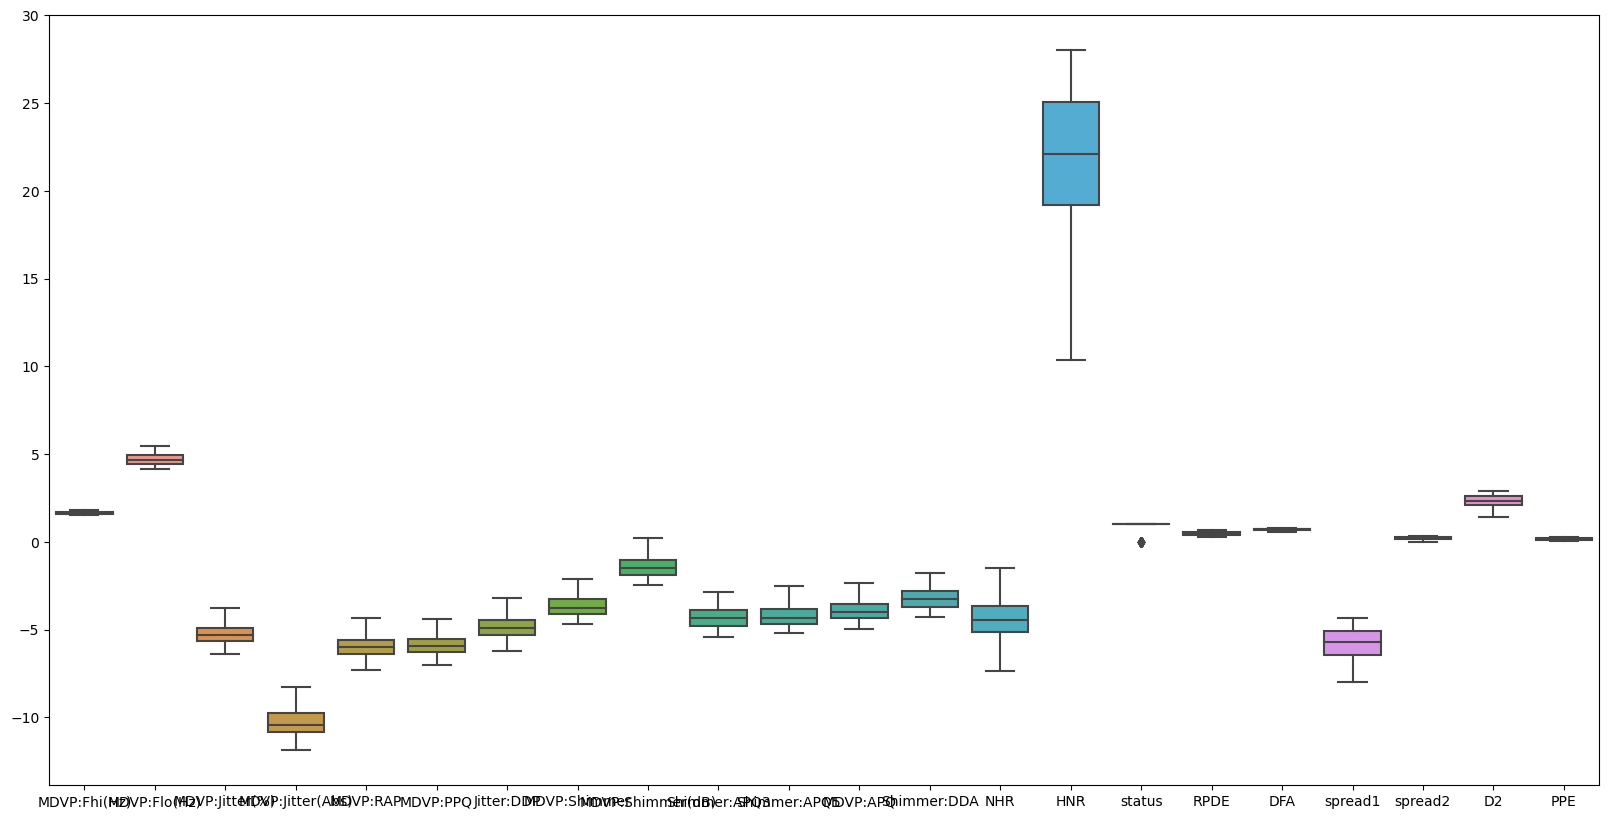

In [158]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data.drop(["MDVP:Fo(Hz)"],axis=1))
plt.show()

## visualization of data after outlier and skewness treatment

<function matplotlib.pyplot.show(close=None, block=None)>

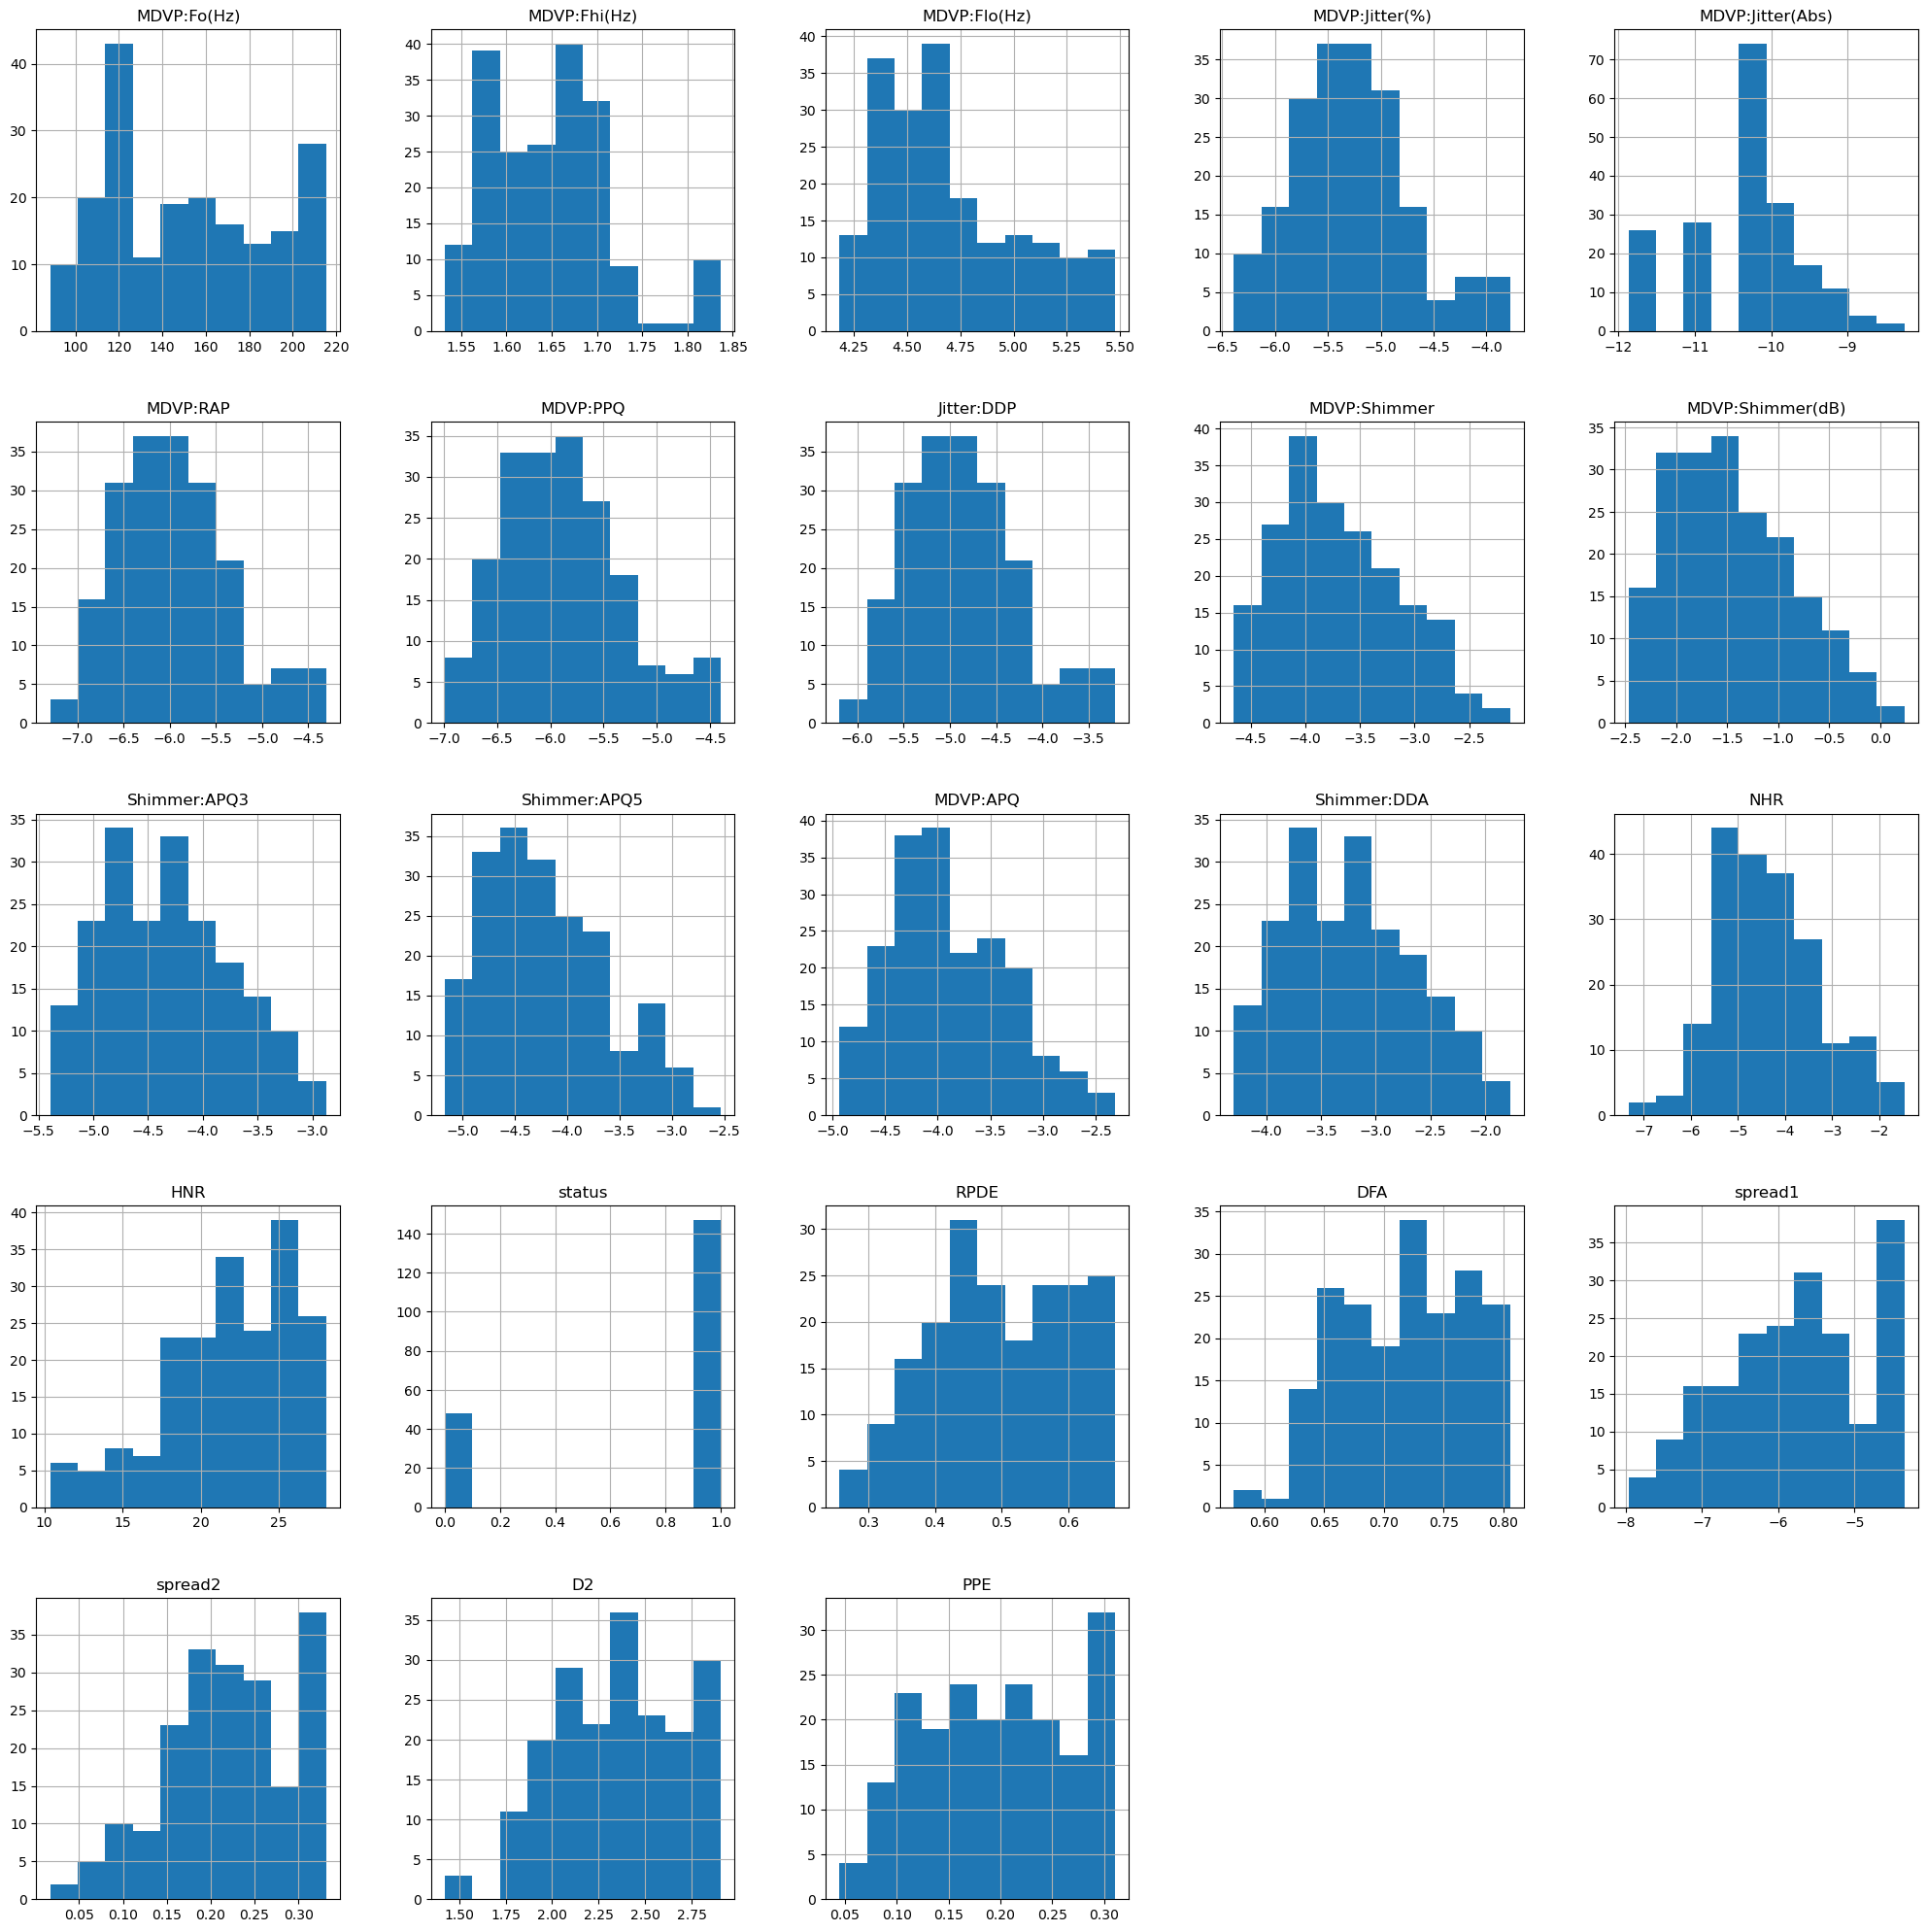

In [159]:
data.hist(figsize=(25,25))
plt.show

# Data Splitting

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
y=data.status

In [162]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [163]:
x=data.drop("status",axis=1)

In [164]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,1.621004,4.317448,-4.848516,-9.567015,-5.599422,-5.195761,-4.501711,-3.129492,-0.853316,...,-3.516272,-2.726469,-3.811725,21.033,0.414783,0.805443,-4.813031,0.266482,2.301442,0.284654
1,122.400,1.609757,4.734609,-4.637693,-9.433484,-5.370888,-4.967576,-4.272993,-2.791323,-0.468405,...,-3.130865,-2.364141,-3.948168,19.085,0.458359,0.805443,-4.344240,0.331676,2.486855,0.310744
2,116.682,1.584334,4.714518,-4.556380,-9.315701,-5.213976,-4.852350,-4.114751,-2.950185,-0.729811,...,-3.327018,-2.492536,-4.335907,20.651,0.429895,0.805443,-4.443179,0.311173,2.342259,0.310744
3,116.676,1.594592,4.712822,-4.608175,-9.315701,-5.294325,-4.964706,-4.196377,-2.901878,-0.659712,...,-3.277565,-2.433719,-4.302846,20.644,0.434969,0.805443,-4.344240,0.331676,2.405554,0.310744
4,116.014,1.600253,4.706417,-4.355190,-9.115030,-5.028290,-4.701681,-3.929169,-2.744974,-0.537854,...,-3.108901,-2.256656,-4.035887,19.649,0.417356,0.805443,-4.344240,0.234513,2.332180,0.310744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,1.694206,4.546068,-5.383875,-10.414313,-5.940771,-5.956097,-4.840893,-3.197359,-0.903868,...,-3.595389,-2.658118,-3.588491,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,1.710813,4.494105,-5.177871,-10.414313,-5.710807,-5.836172,-4.611188,-3.593206,-1.335601,...,-3.974430,-3.034057,-4.011843,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,1.701225,4.307936,-4.297685,-9.433484,-5.076775,-5.177871,-3.977629,-3.768789,-1.362578,...,-4.094145,-3.269117,-2.233526,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,1.789062,4.316207,-4.906275,-10.126631,-5.599422,-5.546779,-4.501711,-3.774002,-1.422958,...,-4.142695,-3.271749,-2.627900,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [166]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((156, 22), (39, 22), (156,), (39,))

In [167]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

## Feature selection

In [168]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [169]:
x.shape

(195, 22)

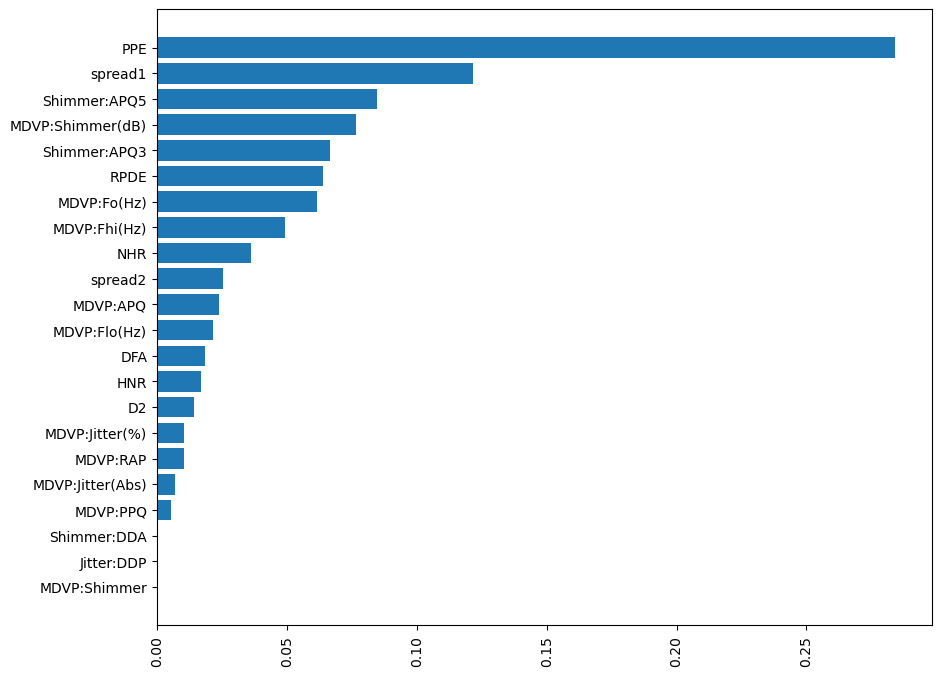

In [170]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# Assuming you have defined your training data 'x' and corresponding labels 'y'

# Fit model on training data
model = XGBClassifier()
model.fit(x, y)

# Get the feature importance scores
importance_scores = model.feature_importances_

# Create a list of feature names
feature_names = list(x.columns)

# Sort the feature importance scores and feature names in descending order
sorted_indices = importance_scores.argsort()[::1]
sorted_scores = importance_scores[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
ax.barh(sorted_feature_names, sorted_scores)
plt.xticks(rotation='vertical')
plt.show()


In [171]:
data=data.drop(["MDVP:RAP"],axis=1)

In [172]:
data=data.drop(["MDVP:Shimmer"],axis=1)

In [173]:
data=data.drop(["Jitter:DDP"],axis=1)

In [174]:
data=data.drop(["Shimmer:DDA"],axis=1)

In [175]:
data=data.drop(["MDVP:PPQ"],axis=1)

In [176]:
data=data.drop(["MDVP:Jitter(Abs)"],axis=1)

In [177]:
data=data.drop(["MDVP:Jitter(%)"],axis=1)

In [178]:
# data=data.drop(["DFA"],axis=1)

In [179]:
# data=data.drop(["Shimmer:APQ5"],axis=1)

In [180]:
# data=data.drop(["MDVP:Shimmer(dB)"],axis=1)

In [181]:
# data=data.drop(["MDVP:Flo(Hz)"],axis=1)

#### we can remove only 6 features, removing more will reduce the accuracy of models

In [182]:
y=data.status
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [183]:
x=data.drop("status",axis=1)
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,1.621004,4.317448,-0.853316,-3.824928,-3.464137,-3.516272,-3.811725,21.033,0.414783,0.805443,-4.813031,0.266482,2.301442,0.284654
1,122.400,1.609757,4.734609,-0.468405,-3.462860,-3.097101,-3.130865,-3.948168,19.085,0.458359,0.805443,-4.344240,0.331676,2.486855,0.310744
2,116.682,1.584334,4.714518,-0.729811,-3.591027,-3.255021,-3.327018,-4.335907,20.651,0.429895,0.805443,-4.443179,0.311173,2.342259,0.310744
3,116.676,1.594592,4.712822,-0.659712,-3.532218,-3.217627,-3.277565,-4.302846,20.644,0.434969,0.805443,-4.344240,0.331676,2.405554,0.310744
4,116.014,1.600253,4.706417,-0.537854,-3.355268,-3.031359,-3.108901,-4.035887,19.649,0.417356,0.805443,-4.344240,0.234513,2.332180,0.310744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,1.694206,4.546068,-0.903868,-3.756730,-3.689680,-3.595389,-3.588491,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,1.710813,4.494105,-1.335601,-4.132670,-4.100161,-3.974430,-4.011843,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,1.701225,4.307936,-1.362578,-4.367729,-4.294016,-4.094145,-2.233526,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,1.789062,4.316207,-1.422958,-4.370098,-4.326781,-4.142695,-2.627900,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [185]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((156, 15), (39, 15), (156,), (39,))

# logistic regression

In [186]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [187]:
lg.fit(x_train,y_train)

LogisticRegression()

In [188]:
lg_p=lg.predict(x_test)

In [189]:
lg_cf=confusion_matrix(lg_p,y_test)
lg_cf

array([[ 7,  2],
       [ 4, 26]], dtype=int64)

In [190]:
lg_acc=lg_cf.diagonal().sum()/lg_cf.sum()*100
lg_acc

84.61538461538461

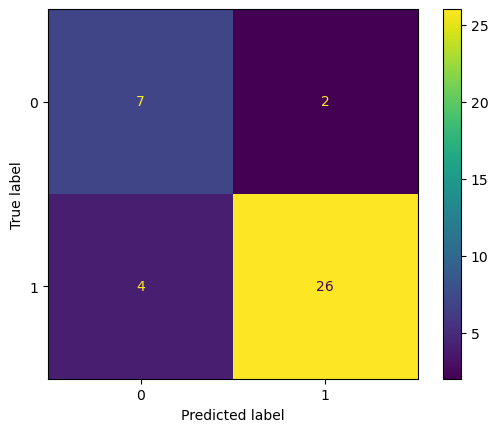

In [191]:
ConfusionMatrixDisplay(confusion_matrix=lg_cf).plot()

In [192]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.93      0.87      0.90        30

    accuracy                           0.85        39
   macro avg       0.78      0.82      0.80        39
weighted avg       0.86      0.85      0.85        39



In [193]:
tp, fn, fp, tn = confusion_matrix(lg_p,y_test).ravel()
tp, fn, fp, tn

(7, 2, 4, 26)

In [194]:
# Specificity = True Negatives / (True Negatives + False Positives)
specificity = tn / (tn + fp)
specificity

0.8666666666666667

In [195]:
# sensitivity = True Positives / (True Positives + False Negatives)
sensitivity = tp / (tp + fn)
sensitivity

0.7777777777777778

In [196]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_iter":[100,200,300,400]}
clf= GridSearchCV(lg, parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'max_iter': 100}

In [197]:
lg=LogisticRegression(max_iter=100)
lg.fit(x_train,y_train)
lg_p=lg.predict(x_test)
lg_cf=confusion_matrix(lg_p,y_test)
lg_acc=lg_cf.diagonal().sum()/lg_cf.sum()*100
lg_cf,lg_acc

(array([[ 7,  2],
        [ 4, 26]], dtype=int64),
 84.61538461538461)

# Decision Tree

In [198]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [199]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [200]:
dt_p=dt.predict(x_test)

In [201]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[ 8,  0],
       [ 3, 28]], dtype=int64)

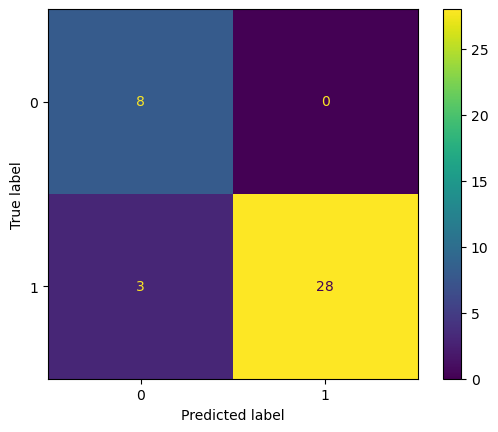

In [202]:
ConfusionMatrixDisplay(confusion_matrix=dt_cf).plot()

In [203]:
dt_acc=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc

92.3076923076923

In [204]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.90      0.95        31

    accuracy                           0.92        39
   macro avg       0.86      0.95      0.90        39
weighted avg       0.94      0.92      0.93        39



In [205]:
tp, fn, fp, tn = confusion_matrix(dt_p,y_test).ravel()
tp, fn, fp, tn
# Specificity = True Negatives / (True Negatives + False Positives)
specificity = tn / (tn + fp)

# sensitivity = True Positives / (True Positives + False Negatives)
sensitivity = tp / (tp + fn)

specificity,sensitivity

(0.9032258064516129, 1.0)

In [206]:
from sklearn.model_selection import GridSearchCV
parameters = {"criterion":['gini',"entropy"],"max_depth":[100,200,300,500,1000],"min_samples_leaf":[1,2,3]}
clf= GridSearchCV(dt, parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'criterion': 'entropy', 'max_depth': 300, 'min_samples_leaf': 1}

In [207]:
dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= 100, min_samples_leaf= 1)
dt.fit(x_train,y_train)
dt_p=dt.predict(x_test)
dt_cf=confusion_matrix(dt_p,y_test)
dt_acc=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc, dt_cf

(87.17948717948718,
 array([[ 7,  1],
        [ 4, 27]], dtype=int64))

# KNN

In [208]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [209]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [210]:
knn_p=knn.predict(x_test)

In [211]:
knn_cf=confusion_matrix(knn_p,y_test)

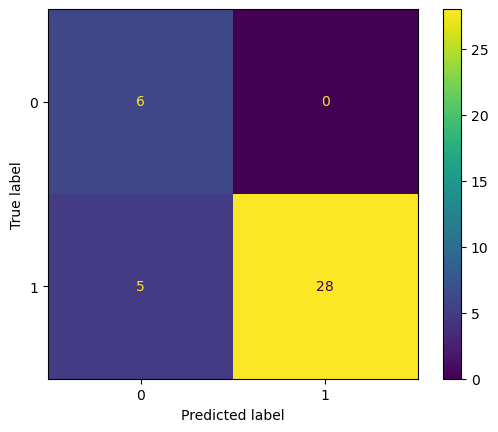

In [212]:
ConfusionMatrixDisplay(confusion_matrix=knn_cf).plot()

In [213]:
knn_acc=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_acc

87.17948717948718

In [214]:
print(classification_report(knn_p,y_test))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71         6
           1       1.00      0.85      0.92        33

    accuracy                           0.87        39
   macro avg       0.77      0.92      0.81        39
weighted avg       0.93      0.87      0.89        39



In [215]:
tp, fn, fp, tn = confusion_matrix(knn_p,y_test).ravel()
tp, fn, fp, tn
# Specificity = True Negatives / (True Negatives + False Positives)
specificity = tn / (tn + fp)

# sensitivity = True Positives / (True Positives + False Negatives)
sensitivity = tp / (tp + fn)

specificity,sensitivity

(0.8484848484848485, 1.0)

In [216]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
clf= GridSearchCV(knn, parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'n_neighbors': 5}

In [217]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_p=knn.predict(x_test)
knn_cf=confusion_matrix(knn_p,y_test)
knn_acc=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_acc, knn_cf

(87.17948717948718,
 array([[ 6,  0],
        [ 5, 28]], dtype=int64))

# Ada Boost

In [218]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [219]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [220]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [221]:
adbo_p=adbo.predict(x_test)

In [222]:
adbo_cf=confusion_matrix(adbo_p,y_test)
adbo_cf

array([[ 8,  1],
       [ 3, 27]], dtype=int64)

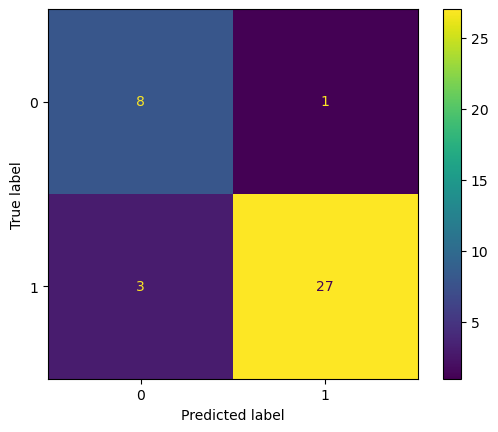

In [223]:
ConfusionMatrixDisplay(confusion_matrix=adbo_cf).plot()

In [224]:
adbo_acc=adbo_cf.diagonal().sum()/adbo_cf.sum()*100
adbo_acc

89.74358974358975

In [225]:
print(classification_report(adbo_p,y_test))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.96      0.90      0.93        30

    accuracy                           0.90        39
   macro avg       0.85      0.89      0.87        39
weighted avg       0.91      0.90      0.90        39



In [226]:
tp, fn, fp, tn = confusion_matrix(adbo_p,y_test).ravel()
tp, fn, fp, tn
# Specificity = True Negatives / (True Negatives + False Positives)
specificity = tn / (tn + fp)

# sensitivity = True Positives / (True Positives + False Negatives)
sensitivity = tp / (tp + fn)

specificity,sensitivity

(0.9, 0.8888888888888888)

# SVM

In [227]:
from sklearn.svm import SVC
svm=SVC()

In [228]:
svm.fit(x_train,y_train)

SVC()

In [229]:
svm_p=svm.predict(x_test)

In [230]:
svm_cf=confusion_matrix(svm_p,y_test)
svm_cf

array([[ 0,  0],
       [11, 28]], dtype=int64)

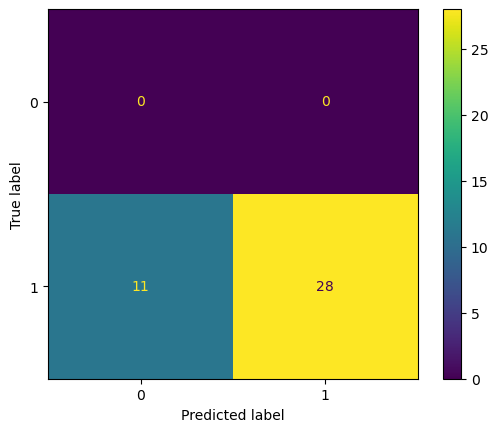

In [231]:
ConfusionMatrixDisplay(confusion_matrix=svm_cf).plot()

In [232]:
svm_acc=svm_cf.diagonal().sum()/svm_cf.sum()*100
svm_acc

71.7948717948718

In [233]:
print(classification_report(svm_p,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.72      0.84        39

    accuracy                           0.72        39
   macro avg       0.50      0.36      0.42        39
weighted avg       1.00      0.72      0.84        39



In [234]:
tp, fn, fp, tn = confusion_matrix(svm_p,y_test).ravel()
tp, fn, fp, tn
# Specificity = True Negatives / (True Negatives + False Positives)
specificity = tn / (tn + fp)

# sensitivity = True Positives / (True Positives + False Negatives)
sensitivity = tp / (tp + fn)

specificity,sensitivity

(0.717948717948718, nan)

In [235]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':np.arange(1,6),'kernel': ['linear', 'rbf']}
clf= GridSearchCV(svm, parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [236]:
svm=SVC(C= 1, kernel= 'linear')
svm.fit(x_train,y_train)
svm_p=svm.predict(x_test)
svm_cf=confusion_matrix(svm_p,y_test)
svm_acc=svm_cf.diagonal().sum()/svm_cf.sum()*100
svm_acc, svm_cf

(87.17948717948718,
 array([[ 7,  1],
        [ 4, 27]], dtype=int64))

# Naive Bayes

In [237]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [238]:
nb.fit(x_train,y_train)

GaussianNB()

In [239]:
nb_p=nb.predict(x_test)

In [240]:
nb_cf=confusion_matrix(nb_p,y_test)
nb_cf

array([[ 7,  4],
       [ 4, 24]], dtype=int64)

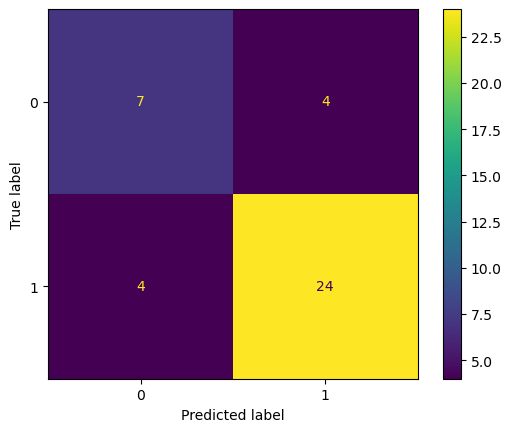

In [241]:
ConfusionMatrixDisplay(confusion_matrix=nb_cf).plot()

In [242]:
nb_acc=nb_cf.diagonal().sum()/nb_cf.sum()*100
nb_acc

79.48717948717949

In [243]:
print(classification_report(nb_p,y_test))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.86      0.86      0.86        28

    accuracy                           0.79        39
   macro avg       0.75      0.75      0.75        39
weighted avg       0.79      0.79      0.79        39



In [244]:
tp, fn, fp, tn = confusion_matrix(nb_p,y_test).ravel()
tp, fn, fp, tn
# Specificity = True Negatives / (True Negatives + False Positives)
specificity = tn / (tn + fp)

# sensitivity = True Positives / (True Positives + False Negatives)
sensitivity = tp / (tp + fn)

specificity,sensitivity

(0.8571428571428571, 0.6363636363636364)

# Random forest

In [245]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [246]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [247]:
rf_p=rf.predict(x_test)

In [248]:
rf_cf=confusion_matrix(rf_p,y_test)
rf_cf

array([[ 7,  0],
       [ 4, 28]], dtype=int64)

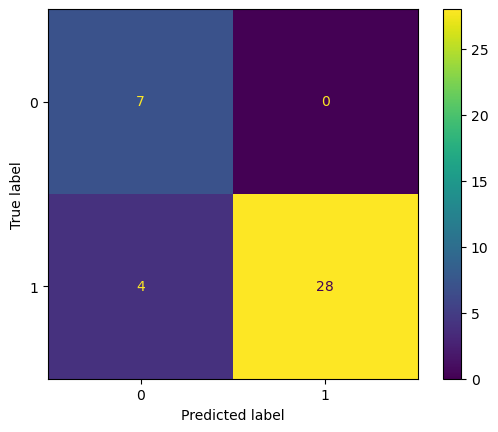

In [249]:
ConfusionMatrixDisplay(confusion_matrix=rf_cf).plot()

In [250]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

89.74358974358975

In [251]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.88      0.93        32

    accuracy                           0.90        39
   macro avg       0.82      0.94      0.86        39
weighted avg       0.93      0.90      0.91        39



In [252]:
tp, fn, fp, tn = confusion_matrix(rf_p,y_test).ravel()
tp, fn, fp, tn
# Specificity = True Negatives / (True Negatives + False Positives)
specificity = tn / (tn + fp)

# sensitivity = True Positives / (True Positives + False Negatives)
sensitivity = tp / (tp + fn)
specificity,sensitivity

(0.875, 1.0)

In [253]:
# from sklearn.model_selection import GridSearchCV
# parameters = {"n_estimators":[100,200,300,400],"criterion":['gini',"entropy"],"max_depth":[100,200,300,500,1000],"min_samples_leaf":[1,2,3]}
# clf= GridSearchCV(rf, parameters)
# clf.fit(x_train,y_train)
# clf.best_params_

In [254]:
rf=RandomForestClassifier(criterion= 'gini', max_depth= 500, min_samples_leaf= 1, n_estimators=100)
rf.fit(x_train,y_train)
rf_p=rf.predict(x_test)
rf_cf=confusion_matrix(rf_p,y_test)
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc, rf_cf

(89.74358974358975,
 array([[ 7,  0],
        [ 4, 28]], dtype=int64))

# XGBoost

In [255]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [256]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [257]:
xgb_p=xgb.predict(x_test)

In [258]:
xgb_cf=confusion_matrix(xgb_p,y_test)
xgb_cf

array([[ 9,  0],
       [ 2, 28]], dtype=int64)

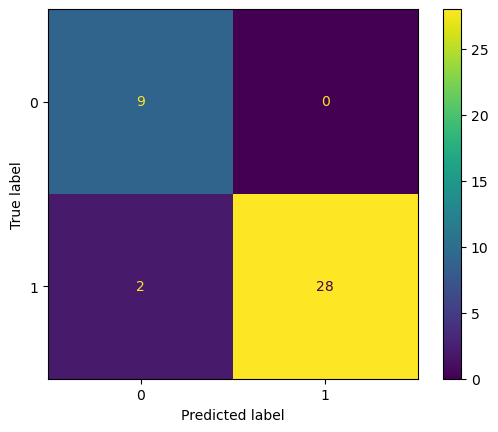

In [259]:
ConfusionMatrixDisplay(confusion_matrix=xgb_cf).plot()

In [260]:
xgb_acc=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_acc

94.87179487179486

In [261]:
print(classification_report(xgb_p,y_test))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.93      0.97        30

    accuracy                           0.95        39
   macro avg       0.91      0.97      0.93        39
weighted avg       0.96      0.95      0.95        39



In [262]:
from sklearn.metrics import roc_curve, auc

In [263]:
fpr, tpr, thresholds = roc_curve(xgb_p,y_test)

In [264]:
roc_auc = auc(fpr, tpr)

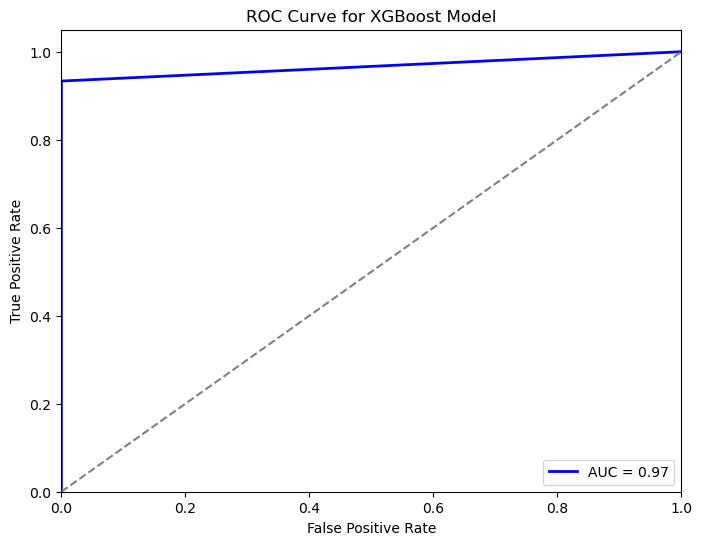

In [265]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc='lower right')
plt.show()

In [266]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2]
}

results=[]

for n_estimators in parameters['n_estimators']:
    for learning_rate in parameters['learning_rate']:
        for max_depth in parameters['max_depth']:
            for subsample in parameters['subsample']:
                for colsample_bytree in parameters['colsample_bytree']:
                    for gamma in parameters['gamma']:
                        for reg_alpha in parameters['reg_alpha']:
                            for reg_lambda in parameters['reg_lambda']:
                                
                                xgb=XGBClassifier(n_estimators=n_estimators,learning_rate=learning_rate,
                                      max_depth= max_depth,
                                      subsample= subsample,
                                      colsample_bytree= colsample_bytree,
                                      gamma= gamma,
                                      reg_alpha= reg_alpha,
                                      reg_lambda= reg_lambda,)
                                
                                xgb.fit(x_train,y_train)
                                xgb_p=xgb.predict(x_test)
                                xgb_cf=confusion_matrix(xgb_p,y_test)
                                xgb_acc=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
                                result_dict={'n_estimators': n_estimators,
                                      'learning_rate':learning_rate,
                                      'max_depth':max_depth,
                                      'subsample':subsample,
                                      'colsample_bytree': colsample_bytree,
                                      'gamma': gamma,
                                      'reg_alpha': reg_alpha,
                                      'reg_lambda':reg_lambda,
                                      'Accuracy': xgb_acc, 
                                      'confusion_matrix': xgb_cf}
                                results.append(result_dict)

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results)

# Print the table of results
print(results_df)
                                                                                       

      n_estimators  learning_rate  max_depth  subsample  colsample_bytree  \
0              100            0.1          3        0.8               0.8   
1              100            0.1          3        0.8               0.8   
2              100            0.1          3        0.8               0.8   
3              100            0.1          3        0.8               0.8   
4              100            0.1          3        0.8               0.8   
...            ...            ...        ...        ...               ...   
6556           300            1.0          5        1.0               1.0   
6557           300            1.0          5        1.0               1.0   
6558           300            1.0          5        1.0               1.0   
6559           300            1.0          5        1.0               1.0   
6560           300            1.0          5        1.0               1.0   

      gamma  reg_alpha  reg_lambda   Accuracy   confusion_matrix  
0       

In [267]:
results_df["Accuracy"].unique()

array([92.30769231, 89.74358974, 94.87179487, 87.17948718, 84.61538462,
       82.05128205, 79.48717949])

In [268]:
df1=results_df.loc[results_df["Accuracy"]<80]

In [270]:
df2=results_df.loc[results_df["Accuracy"]>94].sample(2)

In [271]:
df3=results_df.loc[(results_df["Accuracy"]<94) & (results_df["Accuracy"]>92)].sample(2)

In [272]:
df4=results_df.loc[(results_df["Accuracy"]<92) & (results_df["Accuracy"]>89)].sample(2)

In [273]:
df5=results_df.loc[(results_df["Accuracy"]<89) & (results_df["Accuracy"]>87)].sample(2)

In [274]:
df6=results_df.loc[(results_df["Accuracy"]<87) & (results_df["Accuracy"]>84)].sample(2)

In [275]:
df7=results_df.loc[(results_df["Accuracy"]<84) & (results_df["Accuracy"]>82)].sample(2)

In [276]:
df8=results_df.loc[(results_df["Accuracy"]<82) & (results_df["Accuracy"]>79)].sample(2)

In [277]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)

In [278]:
df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

,n_estimators,learning_rate,max_depth,subsample,colsample_bytree,gamma,reg_alpha,reg_lambda,Accuracy,confusion_matrix
0,200,1.0,5,1.0,0.9,0.1,0.2,0.1,94.871795,"[[9, 0], [2, 28]]"
1,100,0.1,5,0.9,1.0,0.0,0.0,0.2,94.871795,"[[9, 0], [2, 28]]"
2,100,0.1,3,0.9,0.9,0.2,0.1,0.2,92.307692,"[[8, 0], [3, 28]]"
3,300,0.5,3,1.0,0.9,0.0,0.0,0.2,92.307692,"[[8, 0], [3, 28]]"
4,100,0.1,4,0.9,0.9,0.0,0.2,0.0,89.743590,"[[8, 1], [3, 27]]"
5,300,1.0,3,1.0,0.9,0.0,0.1,0.1,89.743590,"[[8, 1], [3, 27]]"
6,300,1.0,5,0.8,1.0,0.1,0.1,0.2,87.179487,"[[7, 1], [4, 27]]"
7,100,1.0,5,0.8,0.8,0.0,0.1,0.1,87.179487,"[[7, 1], [4, 27]]"
8,300,1.0,4,0.8,0.9,0.2,0.2,0.2,84.615385,"[[6, 1], [5, 27]]"
9,200,1.0,4,0.8,1.0,0.2,0.0,0.0,84.615385,"[[7, 2], [4, 26]]"


In [285]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': 200,
    'learning_rate': 1.0,
    'max_depth': 4,
    'subsample': 0.9,
    'colsample_bytree': 0.8,
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2]
}

results=[]

for gamma in parameters['gamma']:
    for reg_alpha in parameters['reg_alpha']:
        for reg_lambda in parameters['reg_lambda']:
            xgb=XGBClassifier(n_estimators=n_estimators,learning_rate=learning_rate,
                              max_depth= max_depth,
                              subsample= subsample,
                              colsample_bytree= colsample_bytree,
                              gamma= gamma,
                              reg_alpha= reg_alpha,
                              reg_lambda= reg_lambda,)
                                
            xgb.fit(x_train,y_train)
            xgb_p=xgb.predict(x_test)
            xgb_cf=confusion_matrix(xgb_p,y_test)
            xgb_acc=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
            result_dict={
                                      'gamma': gamma,
                                      'reg_alpha': reg_alpha,
                                      'reg_lambda':reg_lambda,
                                      'Accuracy': xgb_acc, 
                                      'confusion_matrix': xgb_cf}
            results.append(result_dict)

# Create a DataFrame from the list of dictionaries
results_df2 = pd.DataFrame(results)

# Print the table of results
results_df2
                                                                                       

,gamma,reg_alpha,reg_lambda,Accuracy,confusion_matrix
0,0.0,0.0,0.0,92.307692,"[[8, 0], [3, 28]]"
1,0.0,0.0,0.1,89.743590,"[[7, 0], [4, 28]]"
2,0.0,0.0,0.2,94.871795,"[[9, 0], [2, 28]]"
3,0.0,0.1,0.0,89.743590,"[[7, 0], [4, 28]]"
4,0.0,0.1,0.1,92.307692,"[[8, 0], [3, 28]]"
5,0.0,0.1,0.2,92.307692,"[[8, 0], [3, 28]]"
6,0.0,0.2,0.0,89.743590,"[[7, 0], [4, 28]]"
7,0.0,0.2,0.1,92.307692,"[[8, 0], [3, 28]]"
8,0.0,0.2,0.2,92.307692,"[[8, 0], [3, 28]]"
9,0.1,0.0,0.0,92.307692,"[[8, 0], [3, 28]]"


In [280]:
xgb=XGBClassifier(n_estimators=200,
                  learning_rate=1.0,
                  max_depth= 4,
                  subsample= 0.9,
                  colsample_bytree= 0.8,
                  gamma= 0.1,
                  reg_alpha= 0.2,
                  reg_lambda= 0.2)
xgb.fit(x_train,y_train)
xgb_p=xgb.predict(x_test)
xgb_cf=confusion_matrix(xgb_p,y_test)
xgb_acc=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_acc, xgb_cf

(94.87179487179486,
 array([[ 9,  0],
        [ 2, 28]], dtype=int64))

In [281]:
tp, fn, fp, tn = confusion_matrix(xgb_p,y_test).ravel()
tp, fn, fp, tn
# Specificity = True Negatives / (True Negatives + False Positives)
specificity = tn / (tn + fp)

# sensitivity = True Positives / (True Positives + False Negatives)
sensitivity = tp / (tp + fn)

specificity,sensitivity

(0.9333333333333333, 1.0)

In [282]:
l1=["logistic reg","decision_t","random_f","ada-boost","xgboost","naive bayes","svm","knn"]
l2=[lg_acc,dt_acc,rf_acc,adbo_acc,xgb_acc,nb_acc,svm_acc,knn_acc]

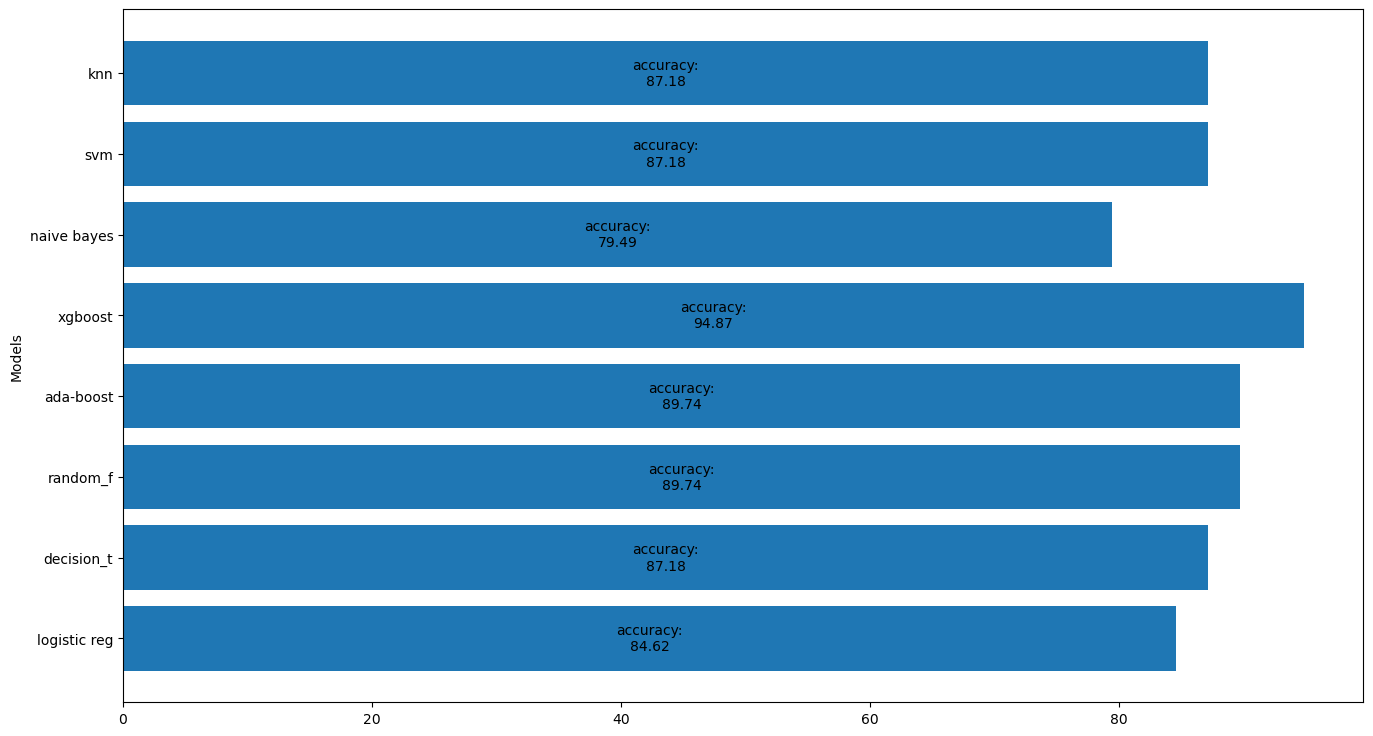

In [283]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(l1,l2)
ax.bar_label(ax.containers[-1], fmt='accuracy:\n%.2f', label_type='center')

ax.set(ylabel='Models')
plt.show()

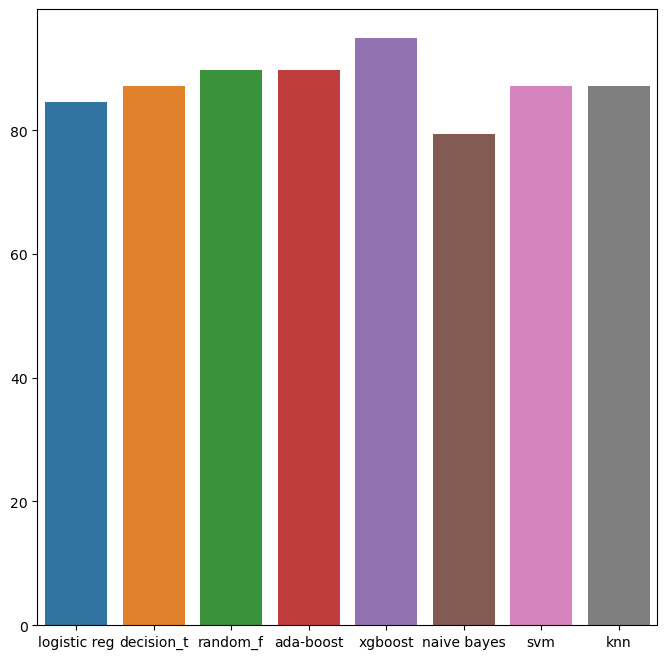

In [297]:
plt.figure(figsize =(8, 8))
plots = sns.barplot(x=l1, y=l2, data=data)

In [345]:
A   = float(input("MDVP:Fo(Hz):"))  
B   = float(input("MDVP:Fhi(Hz):"))  
C      = float(input("MDVP:Flo(Hz):"))    
D  = float(input("MDVP:Shimmer(dB)):"))  
E      = float(input("Shimmer:APQ3:"))  
F      = float(input("Shimmer:APQ5:"))  
G          = float(input("MDVP:APQ:"))  
H               = float(input("NHR:"))  
I               = float(input("HNR:"))               
J              = float(input("RPDE:"))  
K               = float(input("DFA:"))  
L           = float(input("spread1:"))  
M           = float(input("spread2:"))  
N                = float(input("D2:"))  
O              = float(input("PPE:"))  

MDVP:Fo(Hz):1
MDVP:Fhi(Hz):1
MDVP:Flo(Hz):1
MDVP:Shimmer(dB)):1
Shimmer:APQ3:1
Shimmer:APQ5:1
MDVP:APQ:1
NHR:1
HNR:1
RPDE:1
DFA:1
spread1:1
spread2:1
D2:1
PPE:1


In [346]:
prediction_data = [np.log(A),np.log(B),np.log(C),np.log(J),np.log(K),np.log(L),np.log(M),np.log(O),np.log(P),np.log(Q),np.log(R),np.log(S),np.log(T),np.log(U),np.log(V)]

prediction_data = np.array(prediction_data).reshape(1, -1)

prediction = xgb.predict(prediction_data)
if prediction[0]==0:
    print("Patient is Healthy")
else:
    print("Patient is Unhealthy")

Patient is Healthy


In [347]:
import pickle

In [348]:
filename = 'trained_xgboostmodel.sav'
pickle.dump(xgb, open(filename , 'wb'))

In [349]:
loaded_model= pickle.load(open('trained_xgboostmodel.sav','rb'))

In [350]:
prediction_data = [np.log(A),np.log(B),np.log(C),np.log(J),np.log(K),np.log(L),np.log(M),np.log(O),np.log(P),np.log(Q),np.log(R),np.log(S),np.log(T),np.log(U),np.log(V)]

prediction_data = np.array(prediction_data).reshape(1, -1)

prediction = loaded_model.predict(prediction_data)
if prediction[0]==0:
    print("Patient is Healthy")
else:
    print("Patient is Unhealthy")

Patient is Healthy
